Q) Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [38]:
# Importing dataset
data = pd.read_csv('Wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
data['Type'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [40]:
data.Type.unique()

array([1, 2, 3], dtype=int64)

In [41]:
data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

Note: Dropping Type Feature as it is a classifier that we have three types of wines which we need to find in clustering by keeping it will affect our inferences and further analysis

In [42]:
df = data.drop('Type',axis=1)

In [43]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [45]:
# To Check for Missing values 

null_count_col = df.isnull().sum().value_counts(ascending=False)
null_count_col

0    13
dtype: int64

In [46]:
# null count for rows

null_count_row = df.isnull().sum(axis=1).value_counts(ascending=False)
null_count_row

0    178
dtype: int64

In [47]:
# Duplicated values
df.duplicated().sum()

0

In [48]:
df[df.duplicated()]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [ ]:
# EDA

In [49]:
df.skew()

Alcohol           -0.051482
Malic              1.039651
Ash               -0.176699
Alcalinity         0.213047
Magnesium          1.098191
Phenols            0.086639
Flavanoids         0.025344
Nonflavanoids      0.450151
Proanthocyanins    0.517137
Color              0.868585
Hue                0.021091
Dilution          -0.307285
Proline            0.767822
dtype: float64

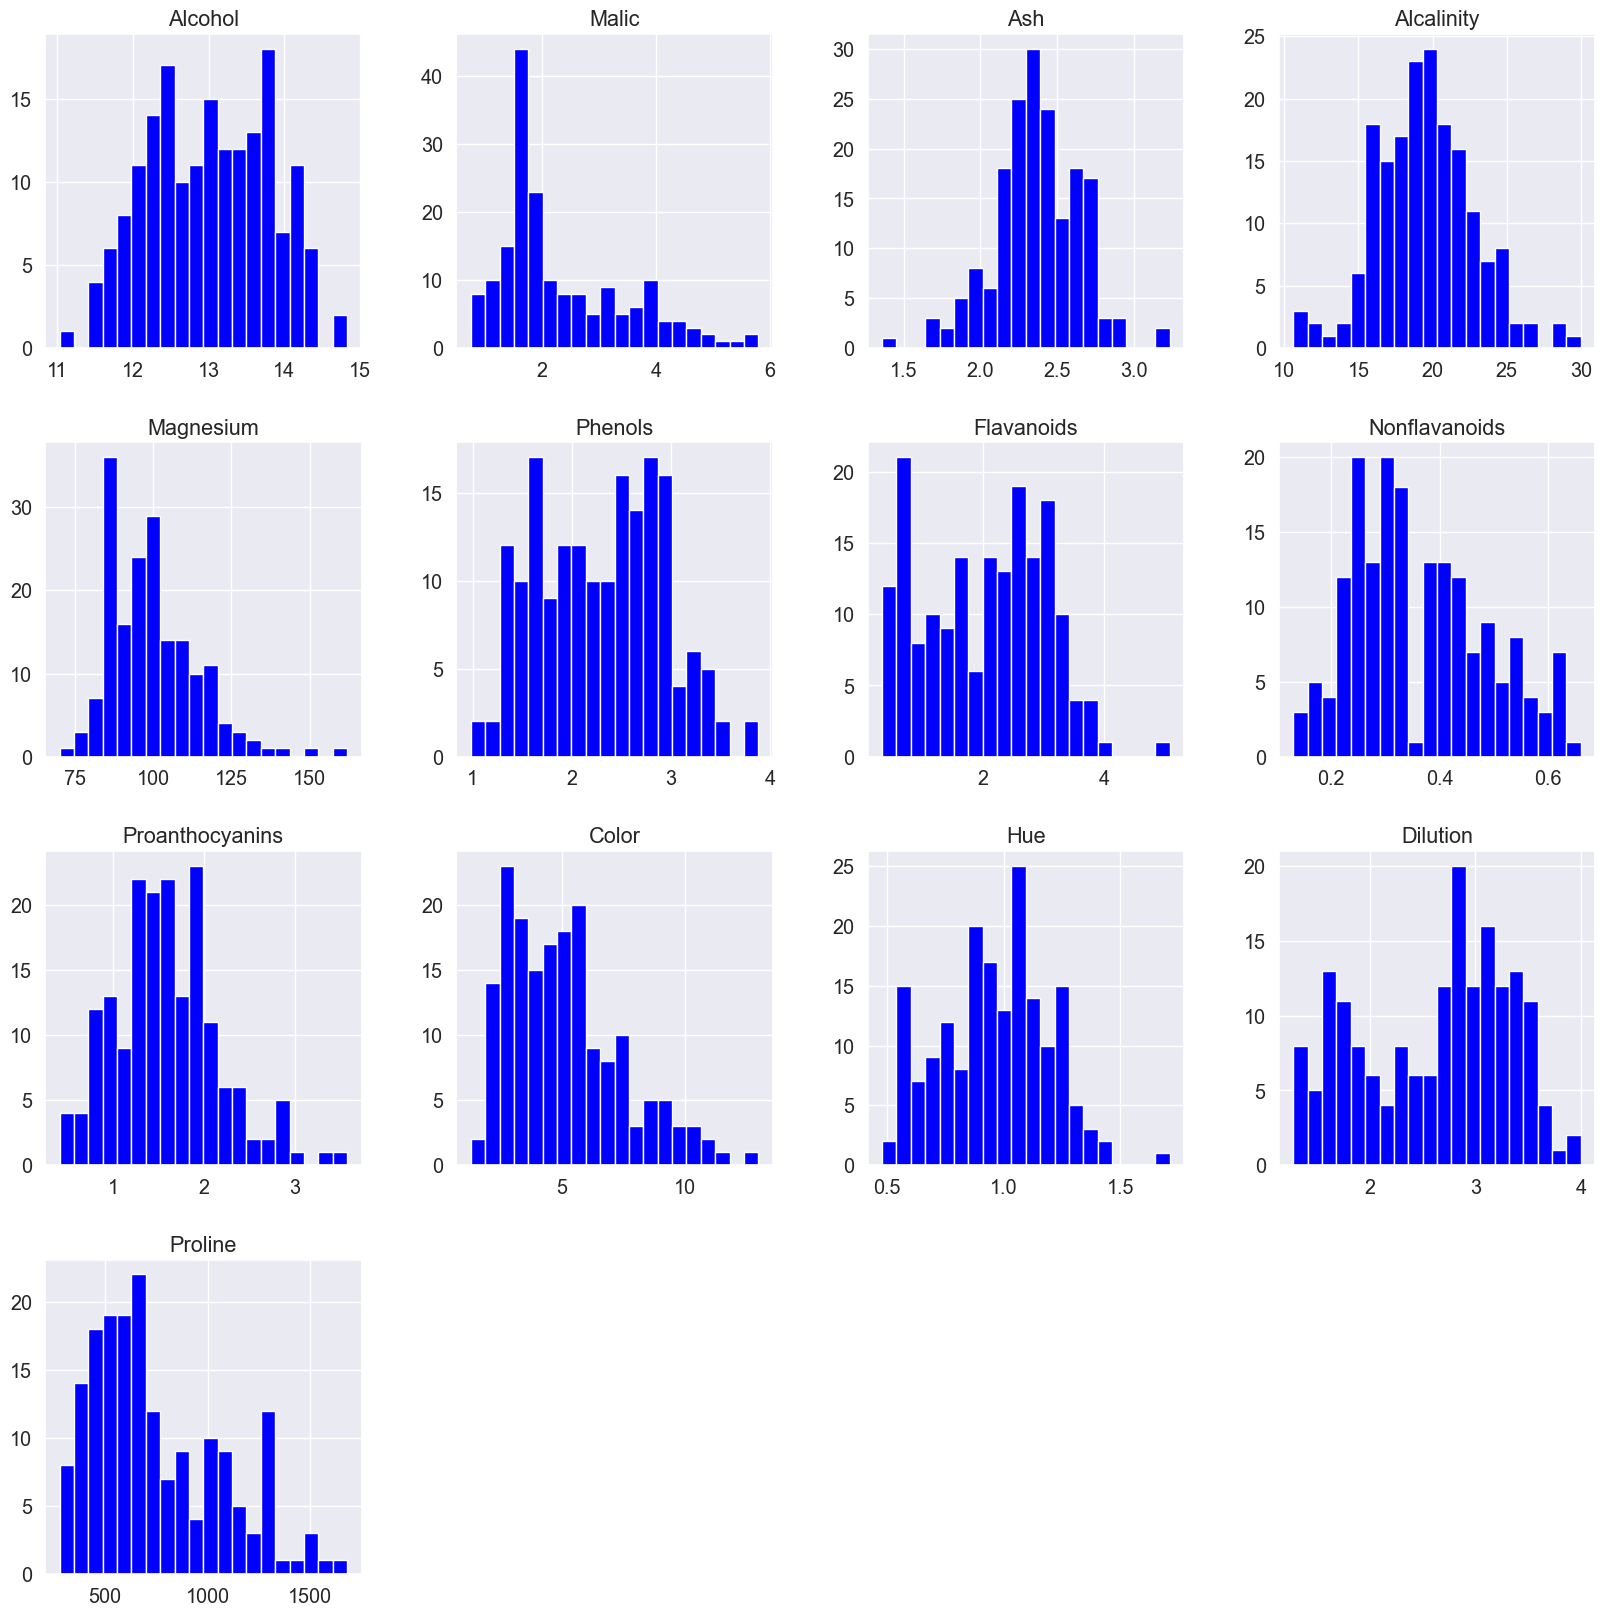

In [50]:
sns.set(style='dark',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=20,color='blue' )

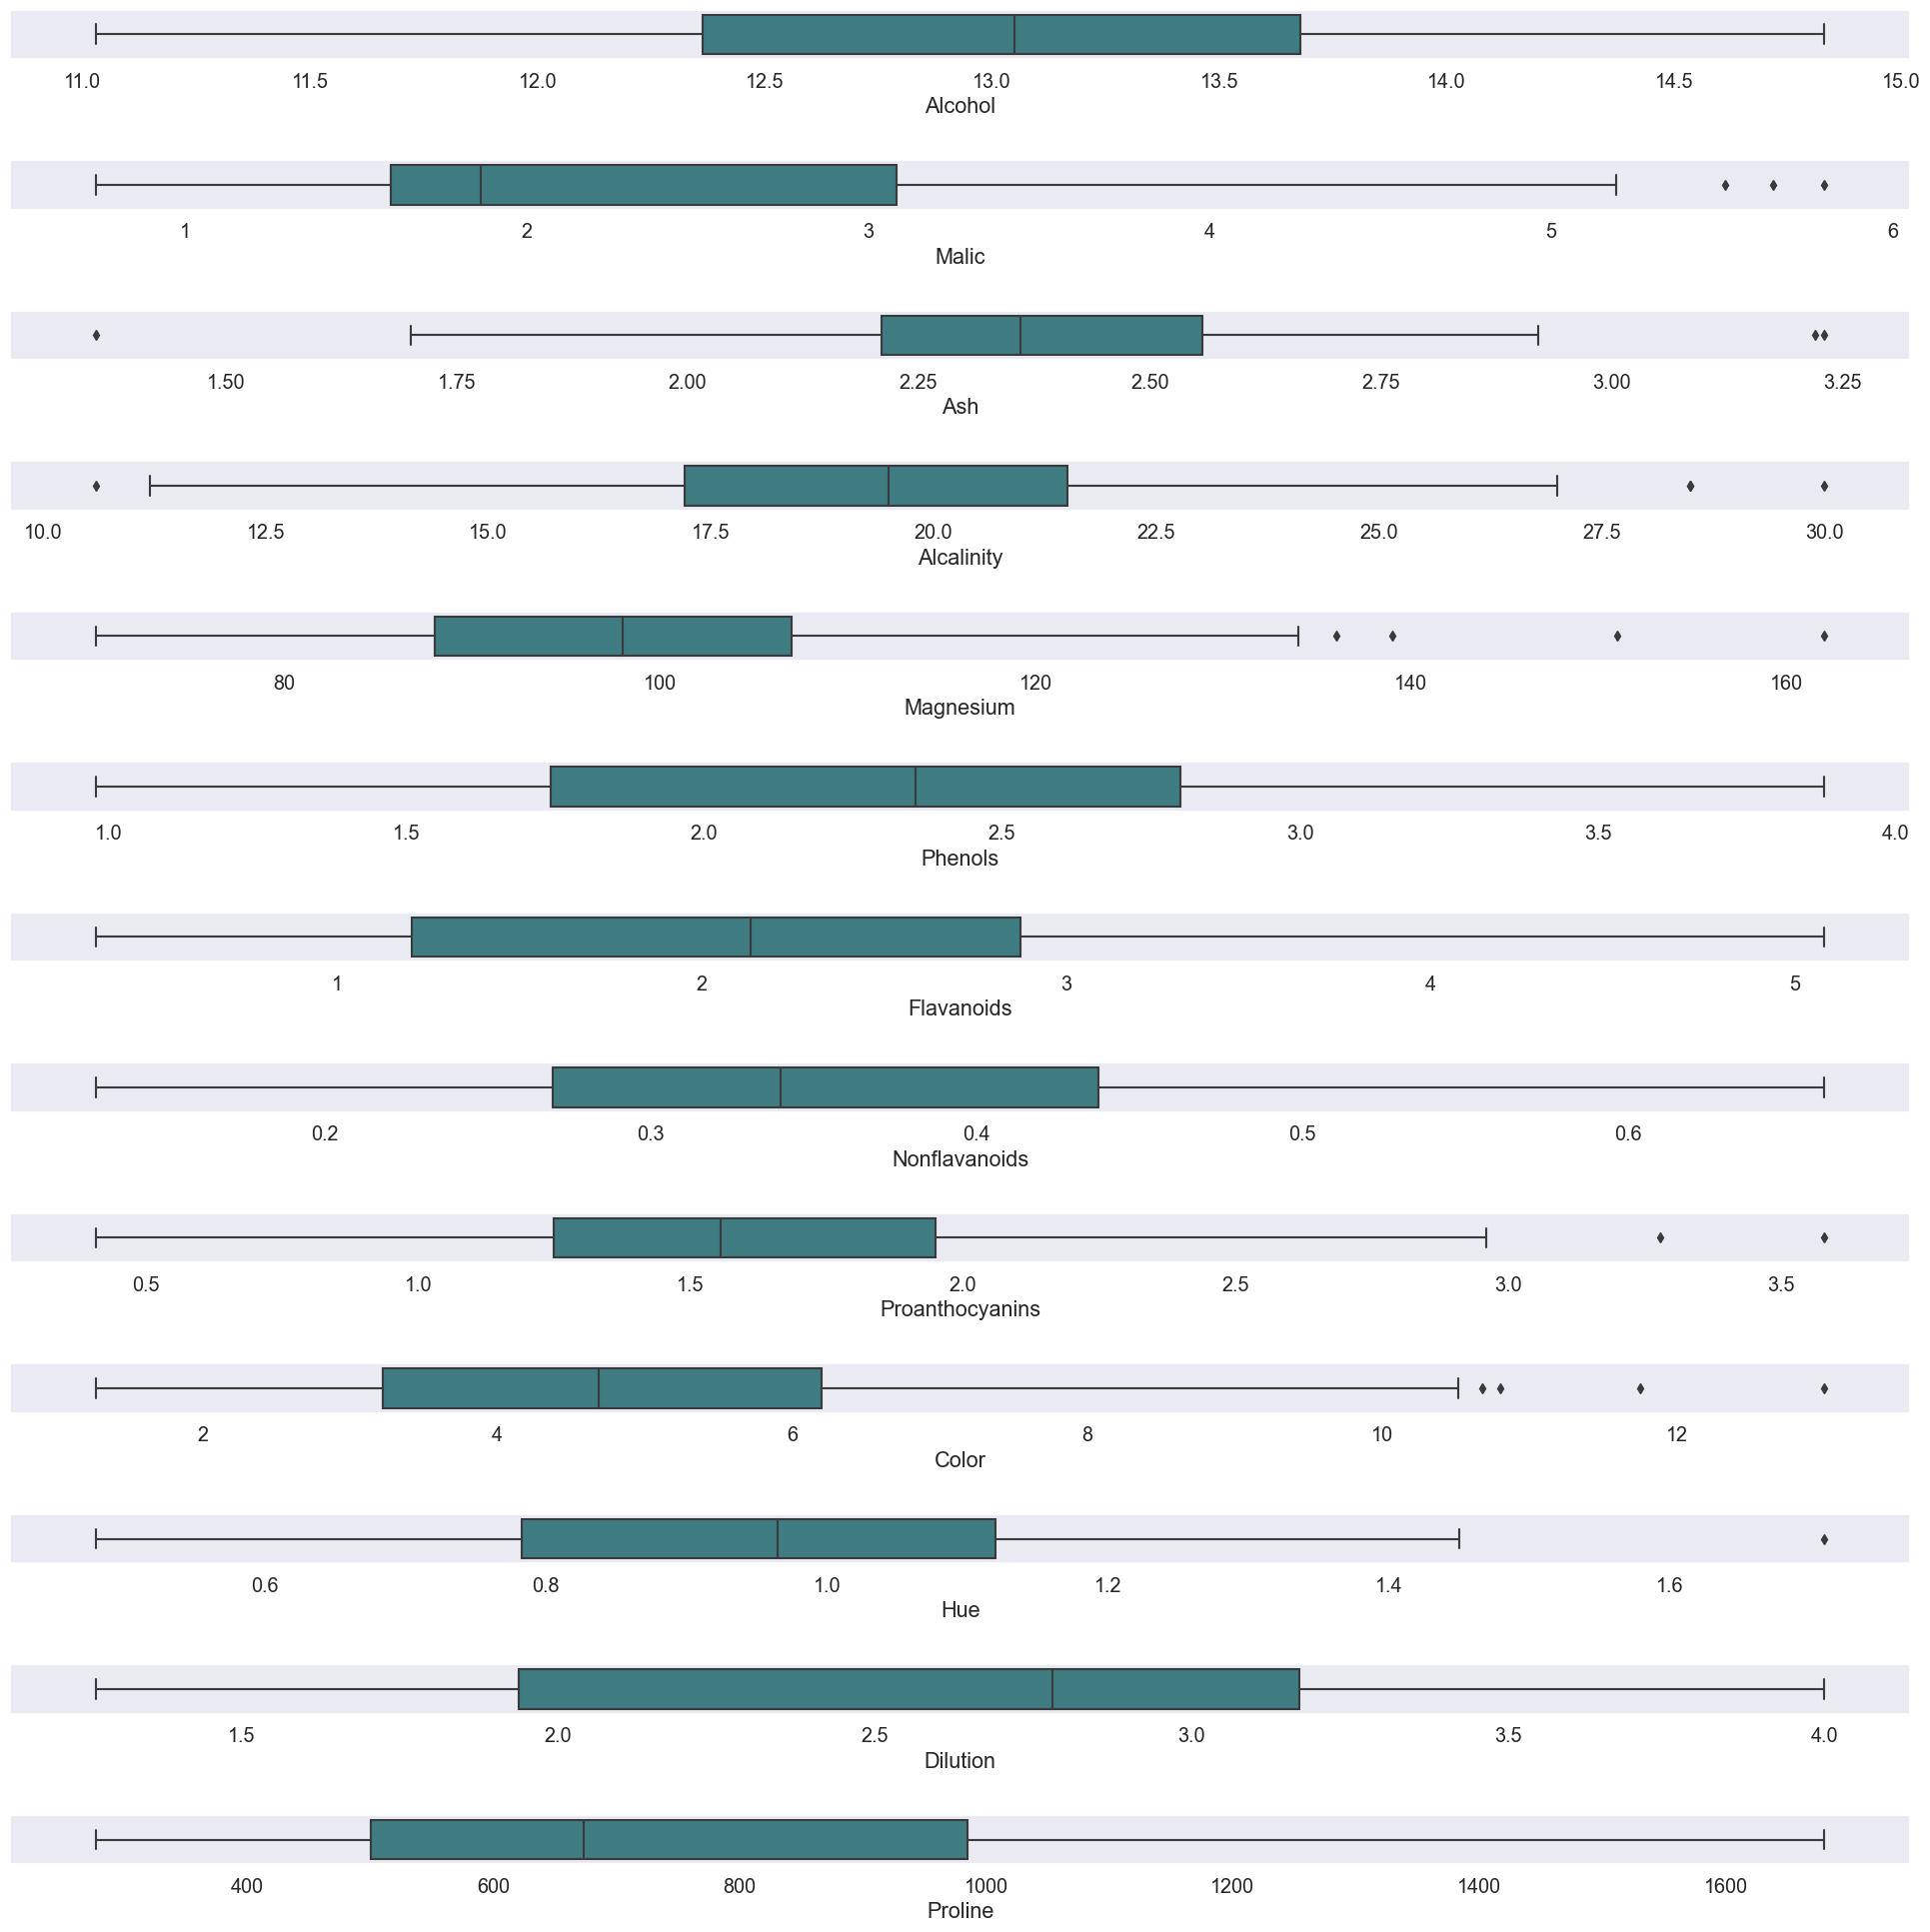

In [51]:
# Checking for Outlier

ot=df.copy() 
fig, axes=plt.subplots(13,1,figsize=(20,20),sharex=False,sharey=False)
sns.boxplot(x='Alcohol',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Malic',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Ash',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Alcalinity',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Magnesium',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Phenols',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Flavanoids',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Nonflavanoids',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Proanthocyanins',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Color',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='Hue',data=ot,palette='crest',ax=axes[10])
sns.boxplot(x='Dilution',data=ot,palette='crest',ax=axes[11])
sns.boxplot(x='Proline',data=ot,palette='crest',ax=axes[12])
plt.tight_layout(pad=2.0)

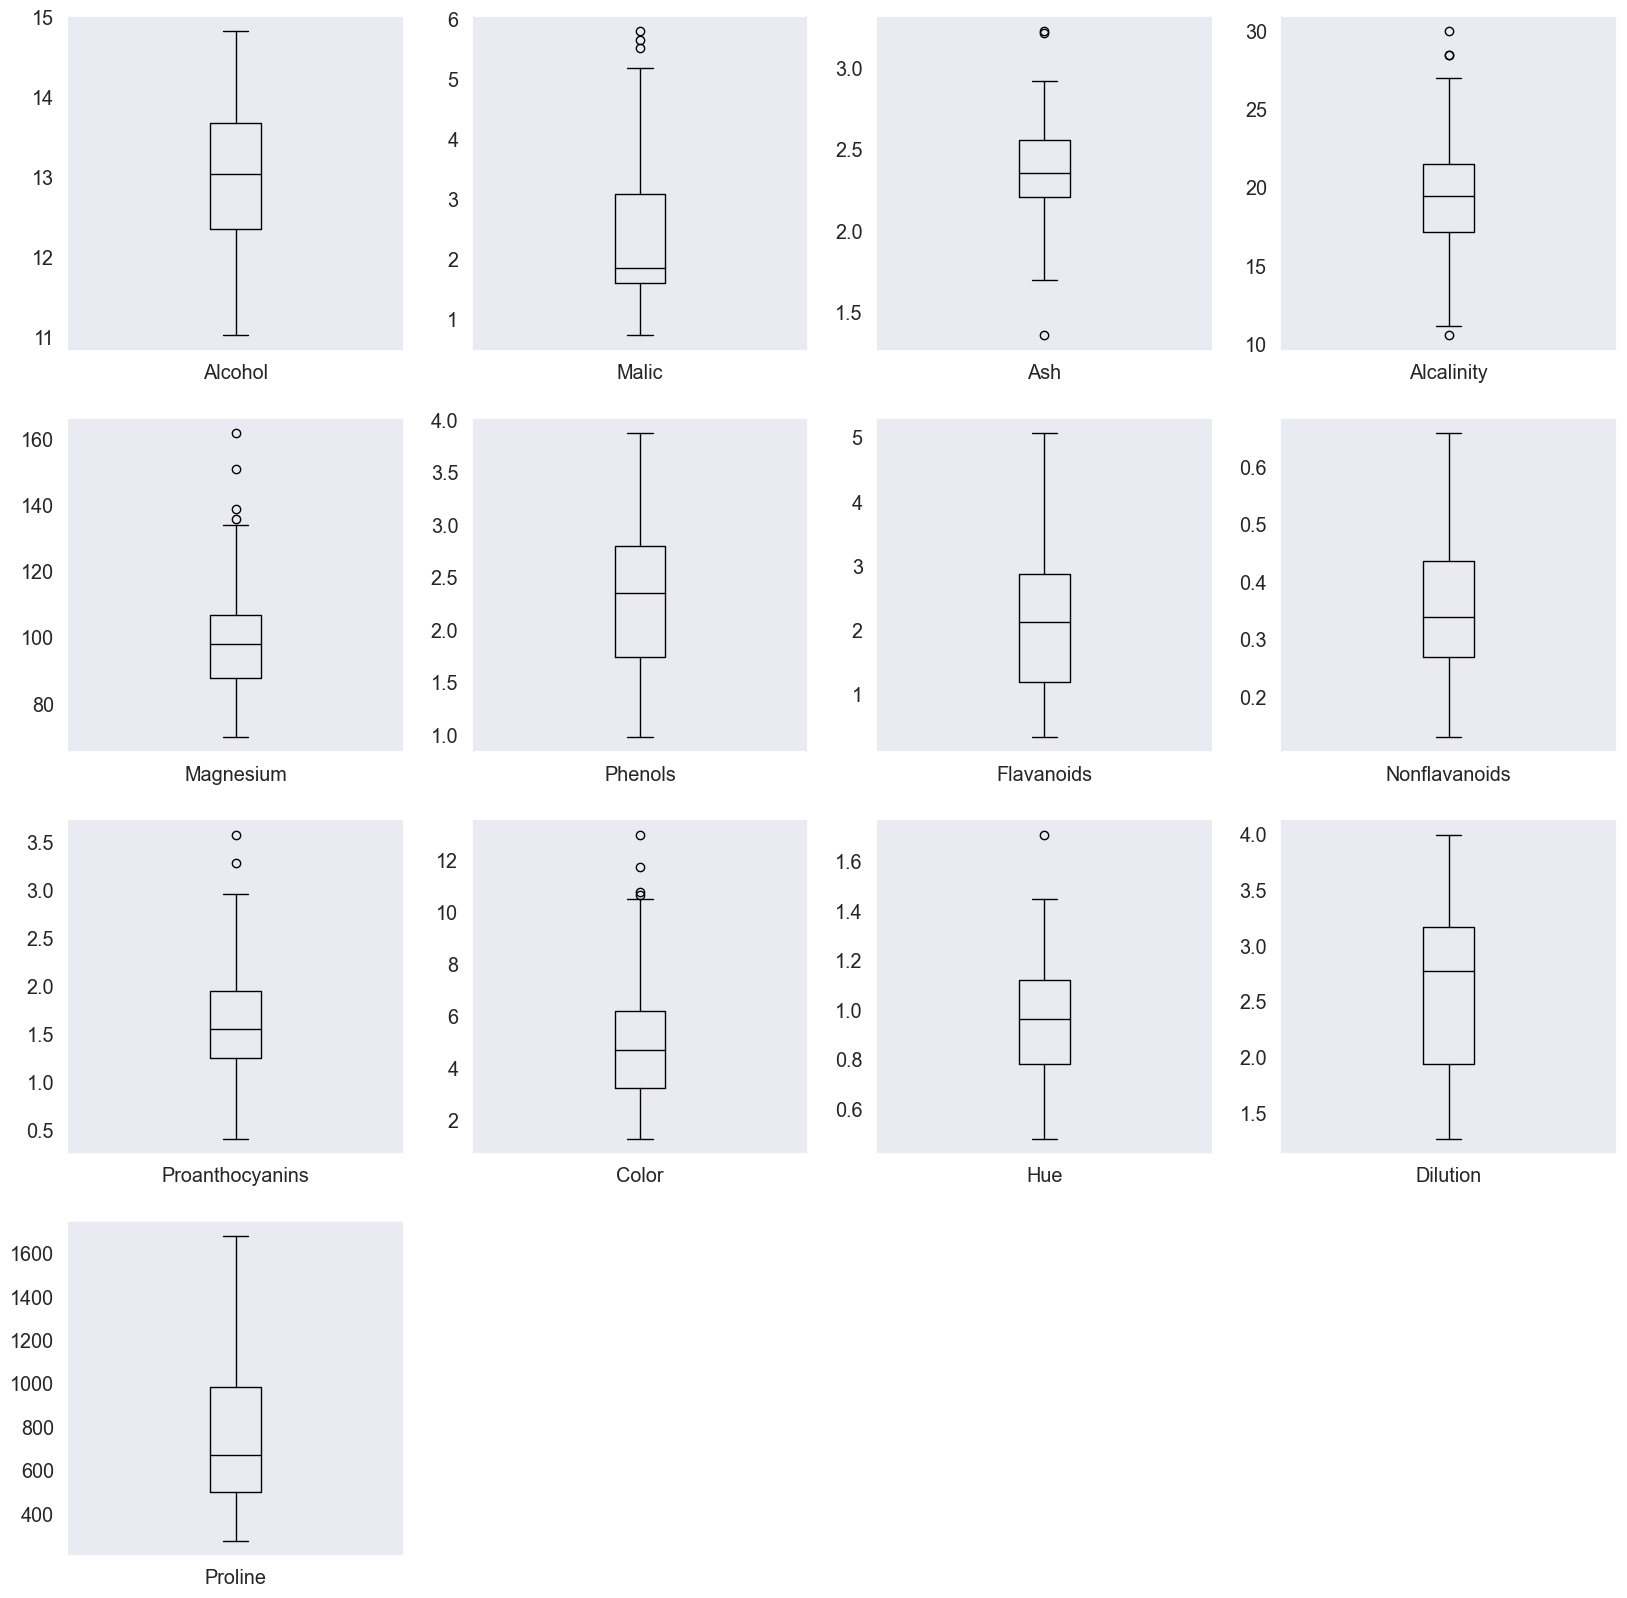

In [52]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

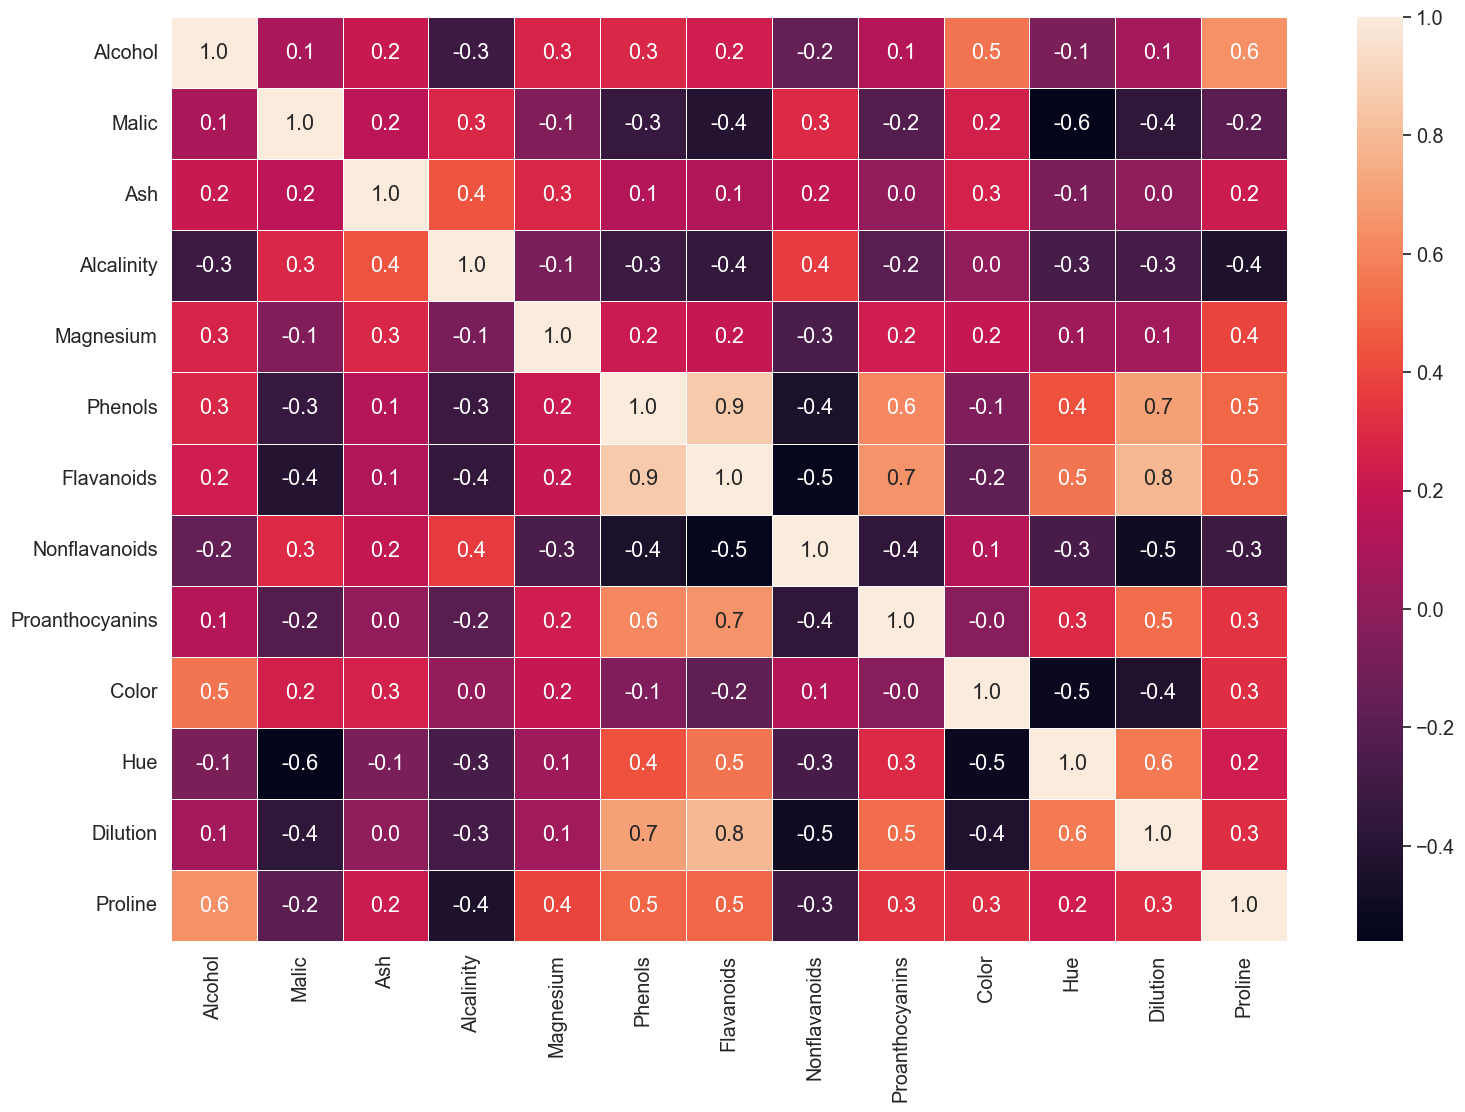

In [53]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(df.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

Note: 1.Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins
      2.Flavanoids is positively correlated with Proanthocyanins and Dilution
      3.Dilution is positively correlated with Hue
      4.Alcohol is positively correlated with Proline

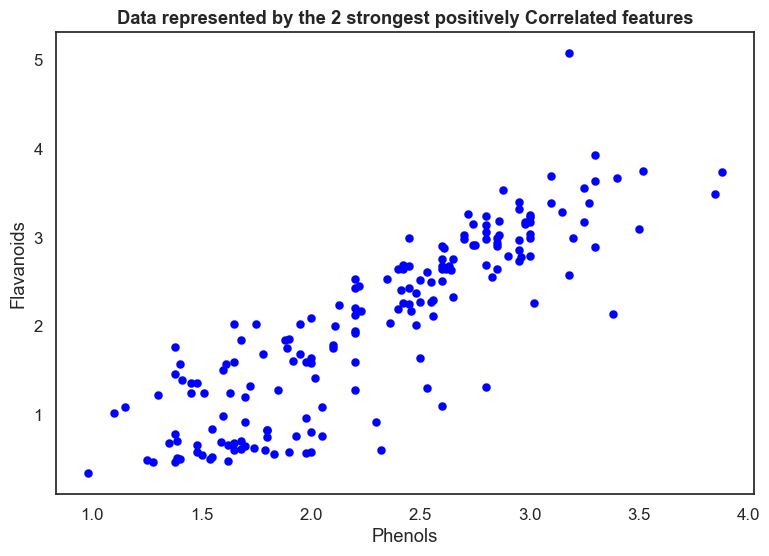

In [54]:
# Plotting frequent flying Phenols vs. Flavanoids  
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=df['Phenols'], y=df['Flavanoids'], color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the 2 strongest positively Correlated features',fontweight='bold')
plt.show()

In [ ]:
# Data Preprocessing

In [55]:
# Applying Standard Scaler on the Data
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df)
std_df.shape

(178, 13)

In [56]:
# Applying MinMax Scaler on Dataset

# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df)
minmax_df.shape

(178, 13)

In [ ]:
# Principal Component Analysis (PCA)

In [ ]:
# PCA on Standard Scaled Dataset

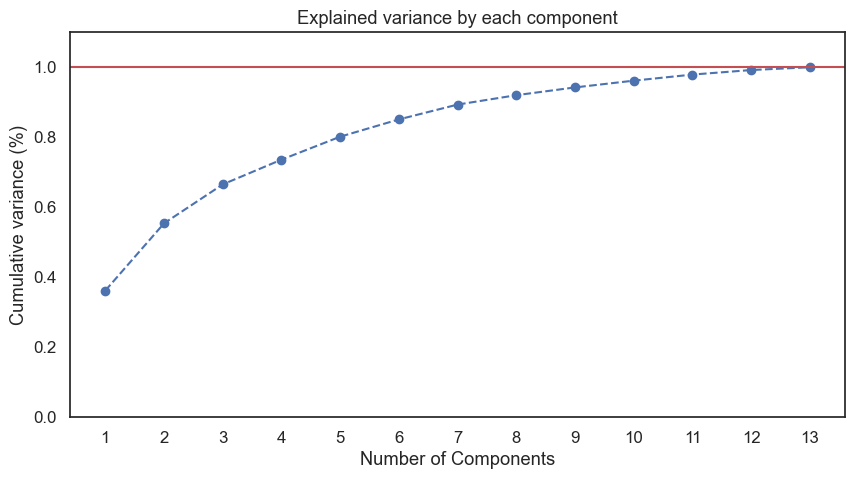

In [57]:
# Explained variance shows how much of the variance/spread of the data is captured in each dimension, i.e. how important each additional principal component is to the original data representation.

# PCA
pca_var = PCA()
pca_var.fit(std_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+std_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+std_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

In [58]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var 

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Text(0.5, 1.0, 'Explained variance by each component')

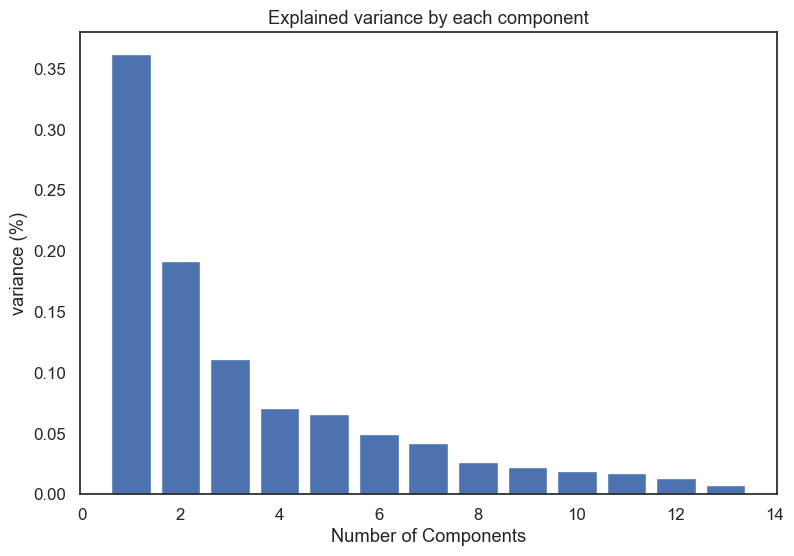

In [59]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [60]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [61]:
# PCA
pca = PCA(n_components=3)
pca_std = pca.fit_transform(std_df)

# Convert to data frame
pca_std_df = pd.DataFrame(data = pca_std, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_std_df.shape)
pca_std_df.head()

(178, 3)


,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


Text(0, 0.5, 'PC2')

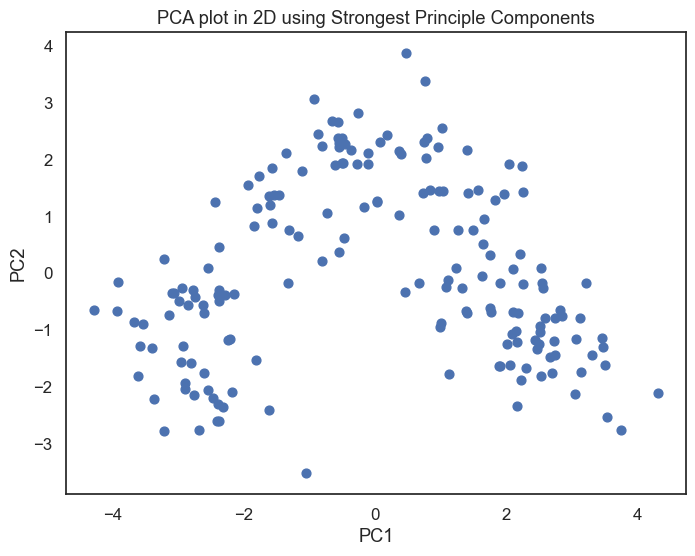

In [62]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [ ]:
# PCA on MinMax Scaled Dataset

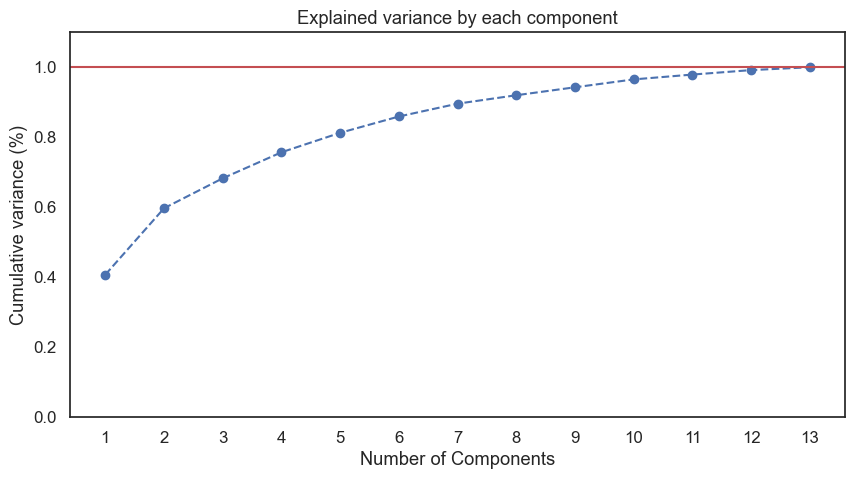

In [63]:
# Explained variance

# PCA
pca_var = PCA()
pca_var.fit(minmax_df)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+minmax_df.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+minmax_df.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

Note: It is interesting to see that with just 2 components we capture over 50% of the variance. And by moving up to 3 components, we get 2 thirds of the variance.

For this reason, sometimes PCA is used for feature selection. For very big datasets with hundreds of features, it can take a long time to train models with some features not adding much value. A solution is to reduce the number of columns by using principal components from PCA. The number of components is normally chosen by looking at the explained variance graph (e.g. a minimum of 60% might be required).

In [64]:
# the amount of variance that each PCA explains is 
var = pca_var.explained_variance_ratio_
var 

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

Text(0.5, 1.0, 'Explained variance by each component')

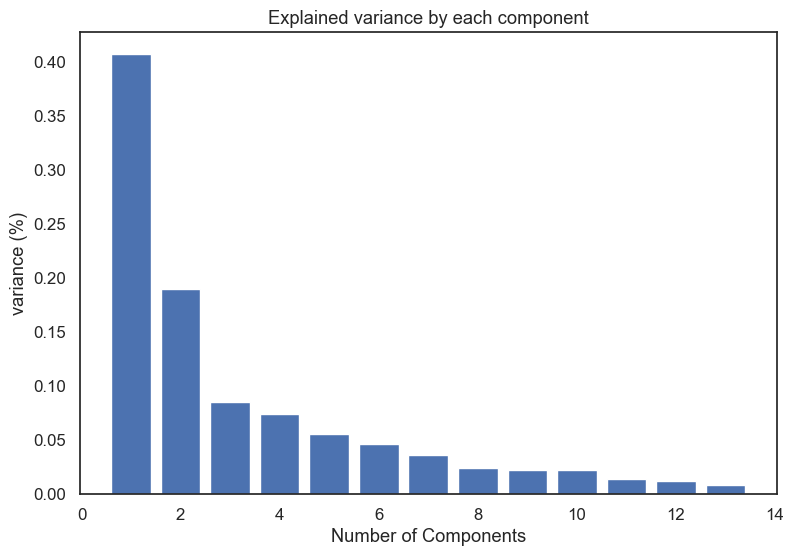

In [65]:
plt.bar(range(1, len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [66]:
# Cumulative Variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

In [67]:
# PCA
pca = PCA(n_components=3)
pca_minmax = pca.fit_transform(minmax_df)

# Convert to data frame
pca_minmax_df = pd.DataFrame(data = pca_minmax, columns = ['PC1', 'PC2','PC3'])

# Shape and preview
print(pca_minmax_df.shape)
pca_minmax_df.head()

(178, 3)


,PC1,PC2,PC3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240


Text(0, 0.5, 'PC2')

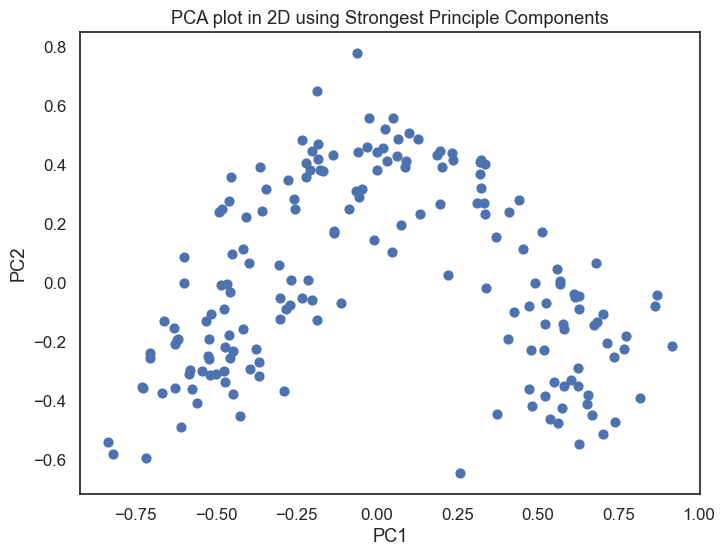

In [68]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

Notes:
      1. Still these points have no colours (yet) because we don't know what their classes are. This is what makes it an                  unsupervised method.
      2. We know our dataset falls naturally into 3 classes (3 types of wine), so we assign colours by clustering the data into          3 groups using techniques such as k-Means and Hierarchical.

In [ ]:
# KMeans Clustering

In [69]:
# Elbow Method for Determining Cluster Amount on PCA Standard Scaled Dataset

inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:26<00:00,  3.31s/it]


In [70]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_std_df)
    silhouette[i] = sil(pca_std_df, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:24<00:00,  3.07s/it]


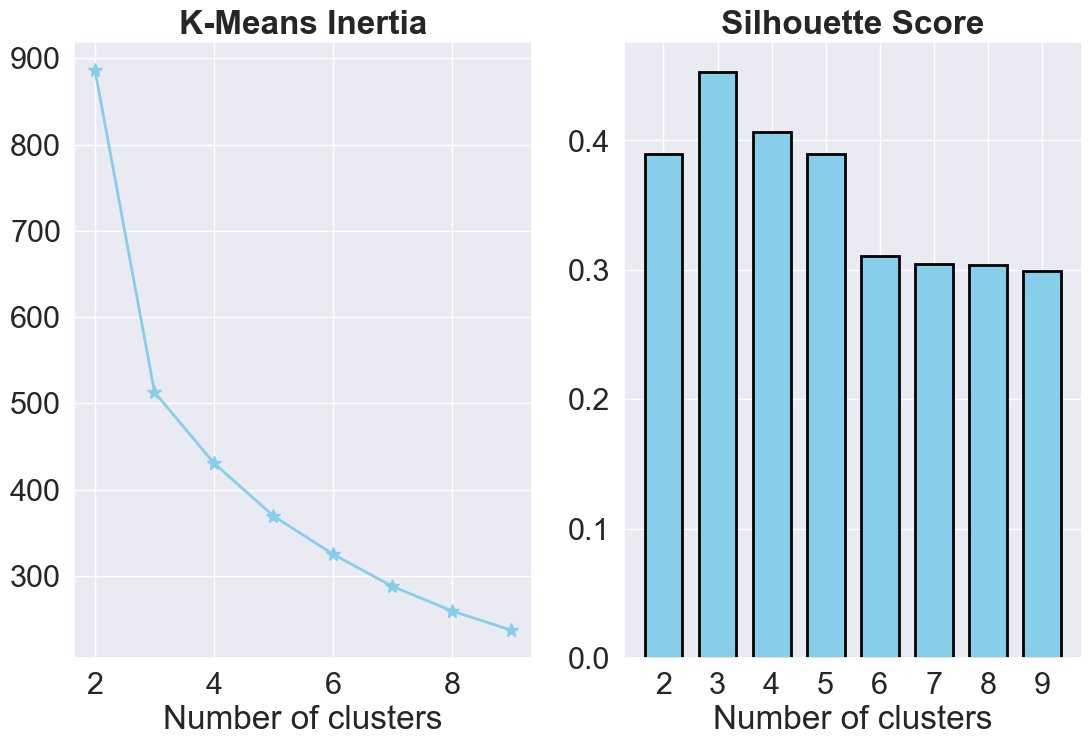

In [71]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

Note: It's clearly visible from "elbow" that 3 no.of clusters seems to be fair and the maximum silhouette score also indicates that.

In [72]:
# the Silhouette score to determine an optimal (K) number.

clust_list = [2,3,4,5,6,7,8,9]  # by default will take from 2

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= sil(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.38938813089003277
For n_clusters = 3 The average silhouette_score is : 0.4532351215683952
For n_clusters = 4 The average silhouette_score is : 0.4071965994633165
For n_clusters = 5 The average silhouette_score is : 0.3819264948812631
For n_clusters = 6 The average silhouette_score is : 0.31894967105962974
For n_clusters = 7 The average silhouette_score is : 0.30312717397160305
For n_clusters = 8 The average silhouette_score is : 0.2976152819938032
For n_clusters = 9 The average silhouette_score is : 0.28998198250936874


Note: As per Silhouette score for standardized data, the ideal number of clusters is 3, with a score higher than other options, of 0.4523

In [ ]:
# Build KMeans Cluster algorithm using K=3 and PCA on Standard Scaler Applied Dataset

In [73]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_df)
y_predict_kmeans.shape

(178,)

In [74]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [75]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [76]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [-7.27201401e-02,  1.77754410e+00,  1.92644149e-01],
       [ 2.27580813e+00, -8.94517592e-01, -2.15032202e-03]])

In [77]:
model_kmeans.inertia_

512.9995067661514

In [78]:
#Assign clusters to the data set
data['Kmeans_label'] = model_kmeans.labels_

In [79]:
# Group data by Clusters (K=6)
data.groupby('Kmeans_label').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,,
0,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,2.000000,12.249062,1.910313,2.233281,20.087500,92.812500,2.227813,2.023438,0.359531,1.619063,2.949219,1.063063,2.803906,507.828125
2,1.063492,13.656032,1.983175,2.460476,17.479365,107.650794,2.858254,3.015079,0.291270,1.922540,5.438413,1.065079,3.157143,1093.238095


In [ ]:
# Elbow Method and Silhouette Score on PCA MinMaxScaler Applied Data

In [80]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:24<00:00,  3.01s/it]


In [81]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(pca_minmax_df)
    silhouette[i] = sil(pca_minmax_df, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:24<00:00,  3.01s/it]


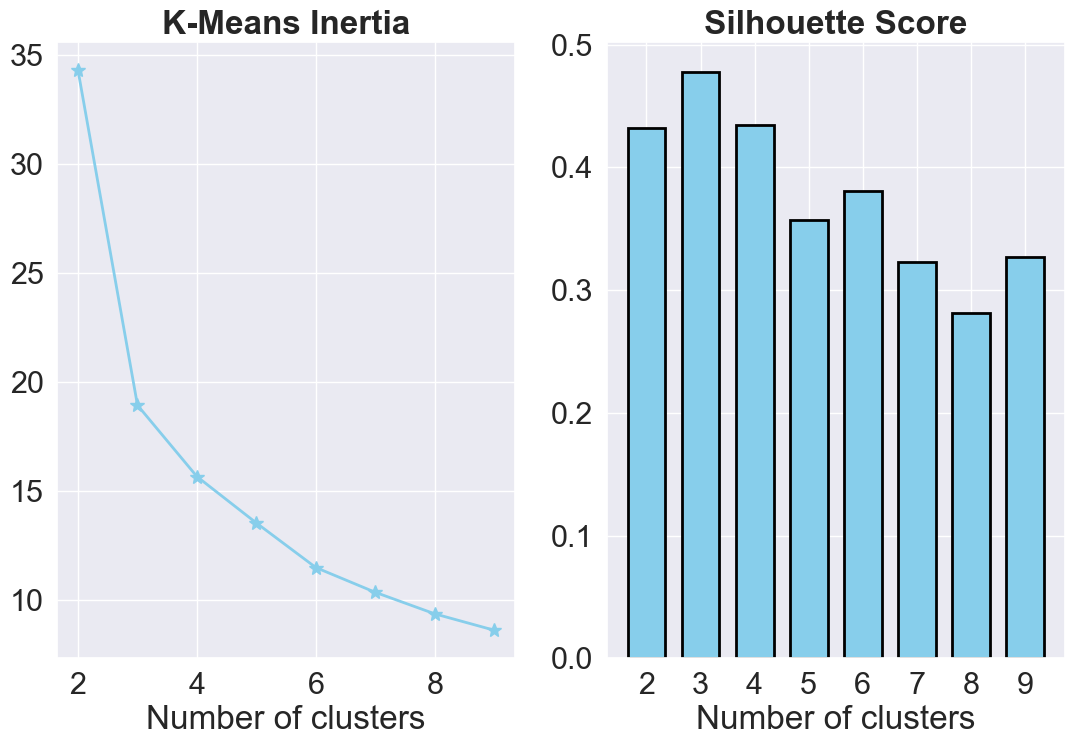

In [83]:
sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

plt.subplot(1,2,1)
plt.plot(range(2,len(inertia)+2), inertia, marker="*", lw=2, color="skyblue", ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia", fontweight='bold')

plt.subplot(1,2,2)
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center', width=.7, edgecolor="black", lw=2, color="skyblue" )
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.xlabel("Number of clusters")
plt.title("Silhouette Score", fontweight='bold')

plt.show()

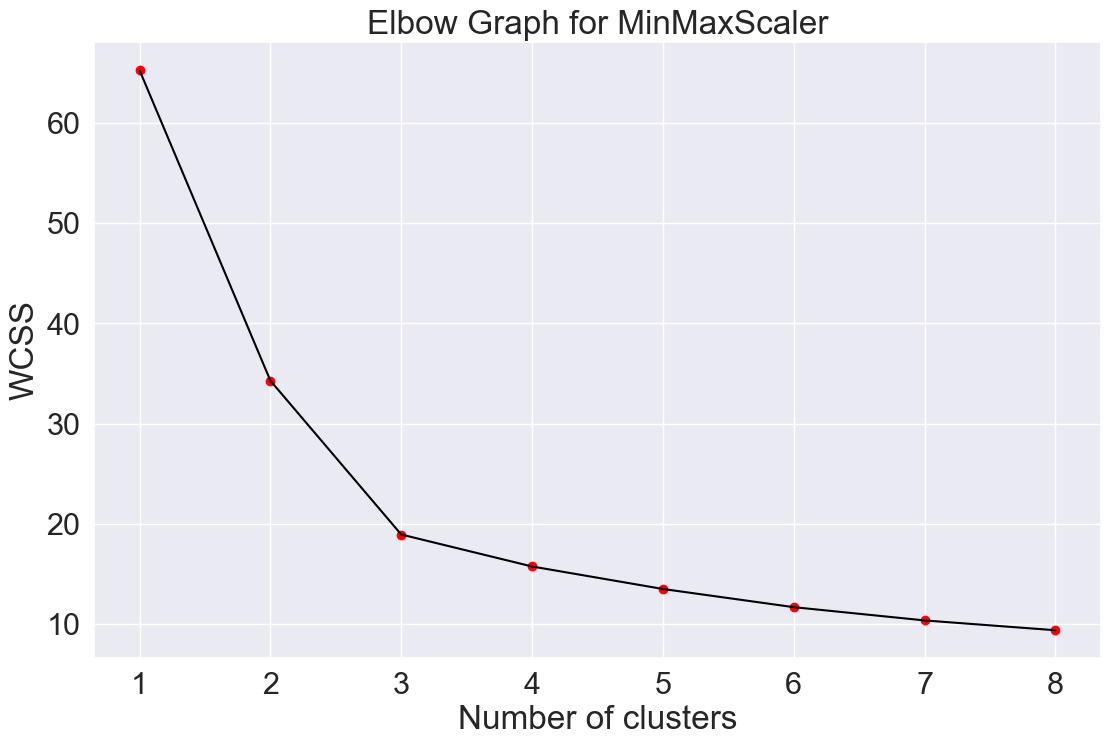

In [84]:
wcss=[]
for i in range (1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(pca_minmax_df)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,9),wcss,color = 'black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for MinMaxScaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
# use of Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for MinMaxScaler Applied on data .

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_minmax_df)
    sil_score1= sil(pca_minmax_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.43235189362905235
For n_clusters = 3 The average silhouette_score is : 0.4779662656834764
For n_clusters = 4 The average silhouette_score is : 0.4347348309376316
For n_clusters = 5 The average silhouette_score is : 0.3988821893147831
For n_clusters = 6 The average silhouette_score is : 0.3677749706015001
For n_clusters = 7 The average silhouette_score is : 0.3109692906138748
For n_clusters = 8 The average silhouette_score is : 0.31644826278441895
For n_clusters = 9 The average silhouette_score is : 0.3146785703353844


Note: As per the silhouette score of PCA on MinMax Scaler Applied data, the ideal number of clusters is 3, with a score higher than other options, of 0.477

In [ ]:
# Build KMeans Cluster algorithm using K=3 and PCA on MinMaxScaler Applied Dataset

In [86]:
model_kmeans = KMeans(n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_minmax_df)
y_predict_kmeans.shape

(178,)

In [87]:
# these are nothing but cluster labels...

y_predict_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [88]:
model_kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [89]:
# cluster centres associated with each lables

model_kmeans.cluster_centers_

array([[ 0.59750634, -0.21895939, -0.01057291],
       [ 0.01701227,  0.36612572,  0.01352436],
       [-0.48503975, -0.17742871, -0.0046045 ]])

In [90]:
model_kmeans.inertia_

18.93826083046645

In [91]:
df['Kmeans_label'] = model_kmeans.labels_

In [92]:
# Group data by Clusters (K=3)
df.groupby('Kmeans_label').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,12.202742,1.946774,2.249839,20.211290,93.451613,2.200806,2.038710,0.369032,1.607903,2.949355,1.056387,2.801129,502.709677
2,13.656923,1.946154,2.437692,17.441538,106.584615,2.864615,2.970000,0.284308,1.923846,5.361692,1.071385,3.148923,1080.107692


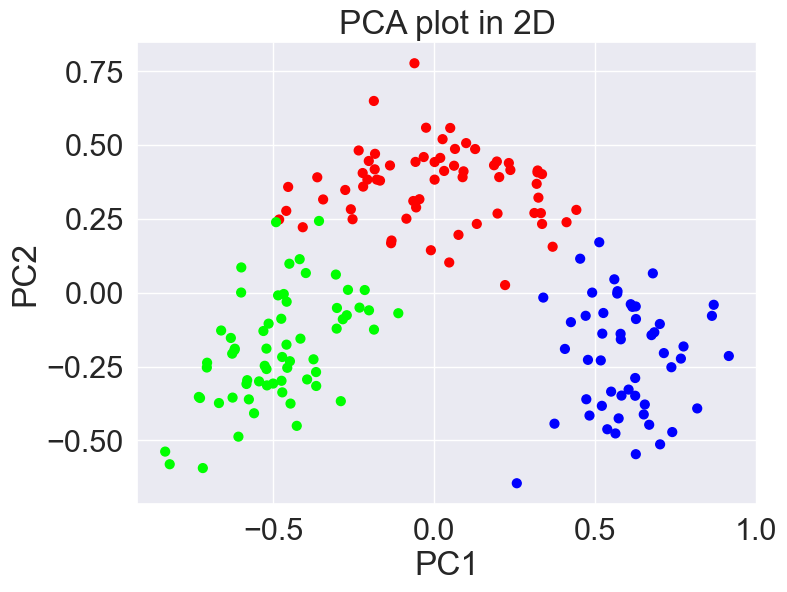

In [93]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

We can now clearly see the 3 number of clusters formed

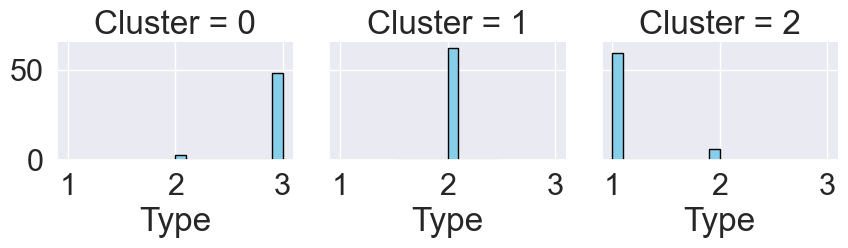

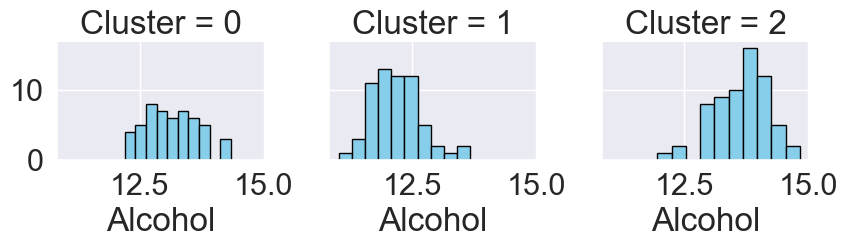

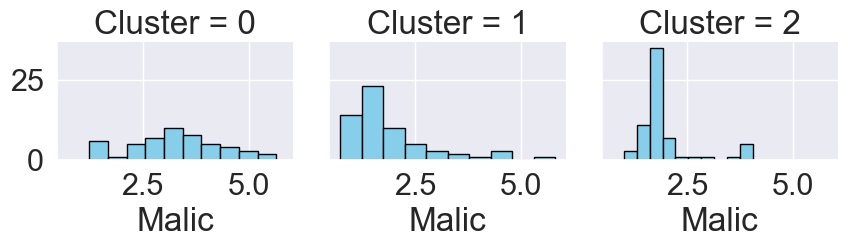

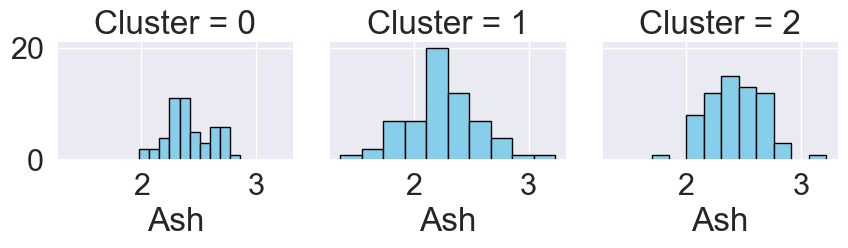

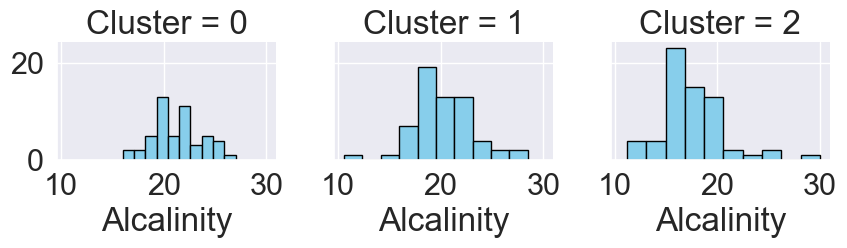

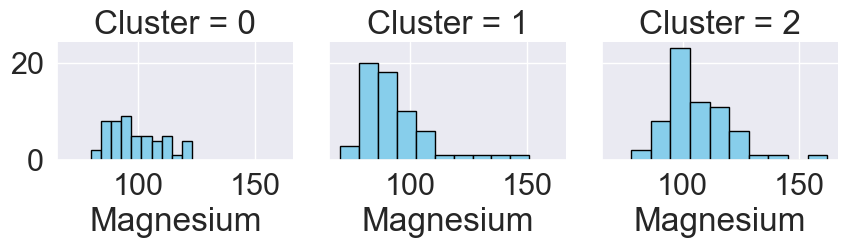

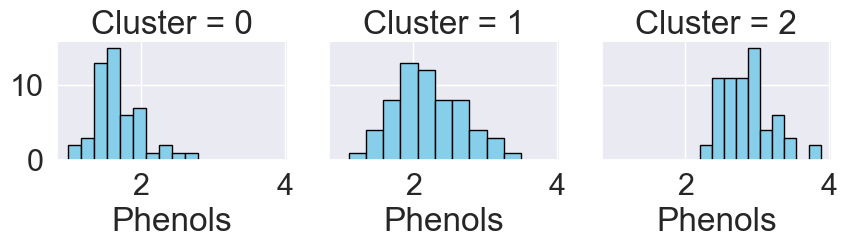

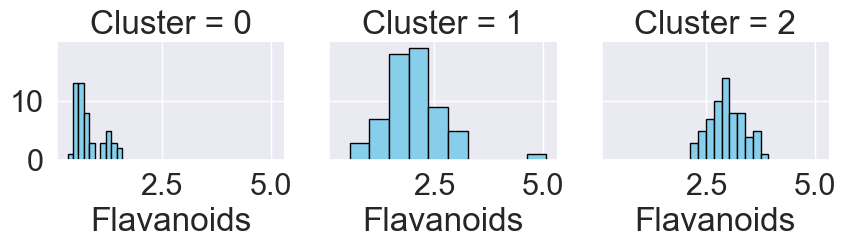

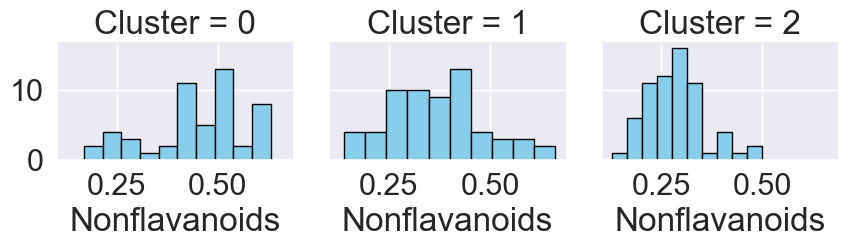

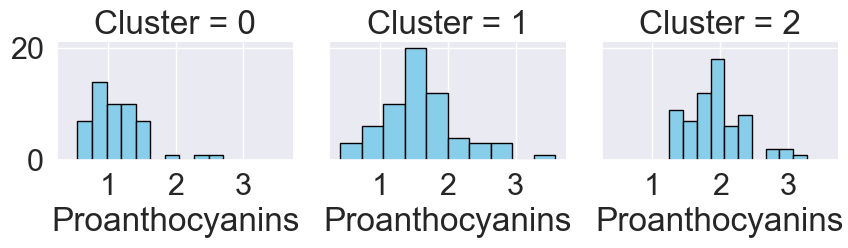

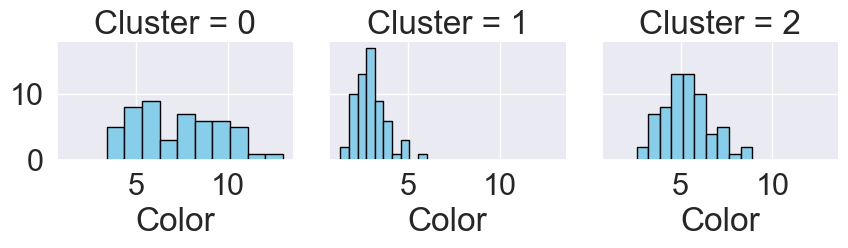

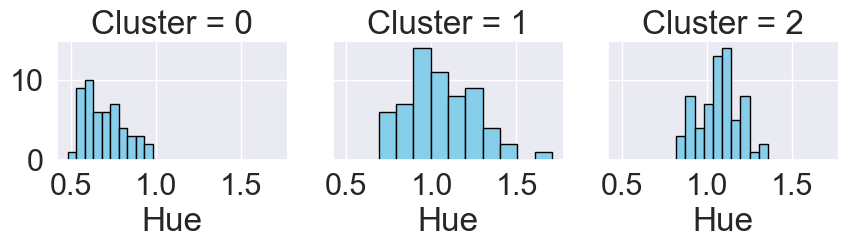

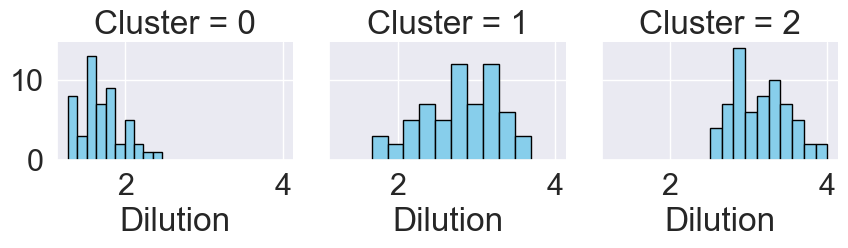

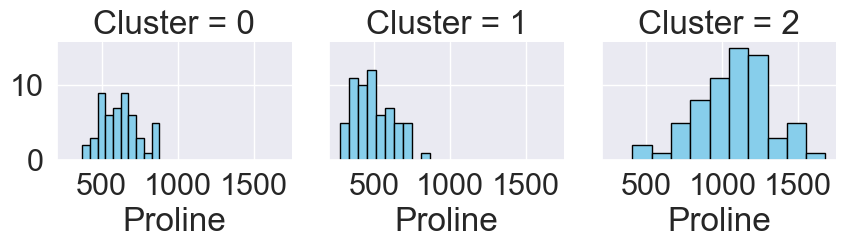

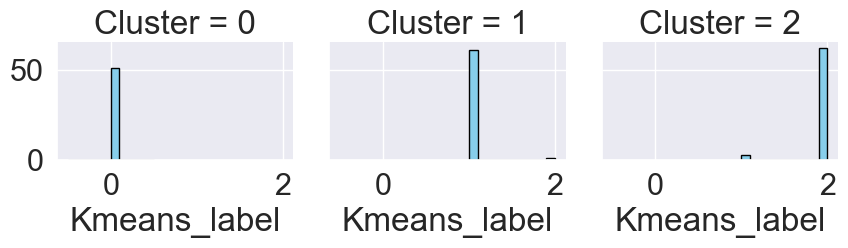

In [94]:
df1 = data.copy()
df1['Cluster'] = model_kmeans.labels_

aux=df1.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid", rc={'figure.figsize':(13,8)}, font_scale=2)

for cluster in aux[0:len(aux)-1]:
    grid = sns.FacetGrid(df1, col="Cluster")
    grid.map(plt.hist, cluster, color="skyblue", lw=1, edgecolor="black")

In [95]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster2_avg'])

In [96]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg,Cluster2_avg
Type,2.941176,2.000000,1.092308
Alcohol,13.134118,12.202742,13.656923
Malic,3.307255,1.946774,1.946154
Ash,2.417647,2.249839,2.437692
Alcalinity,21.241176,20.211290,17.441538
Magnesium,98.666667,93.451613,106.584615
Phenols,1.683922,2.200806,2.864615
Flavanoids,0.818824,2.038710,2.970000
Nonflavanoids,0.451961,0.369032,0.284308
Proanthocyanins,1.145882,1.607903,1.923846


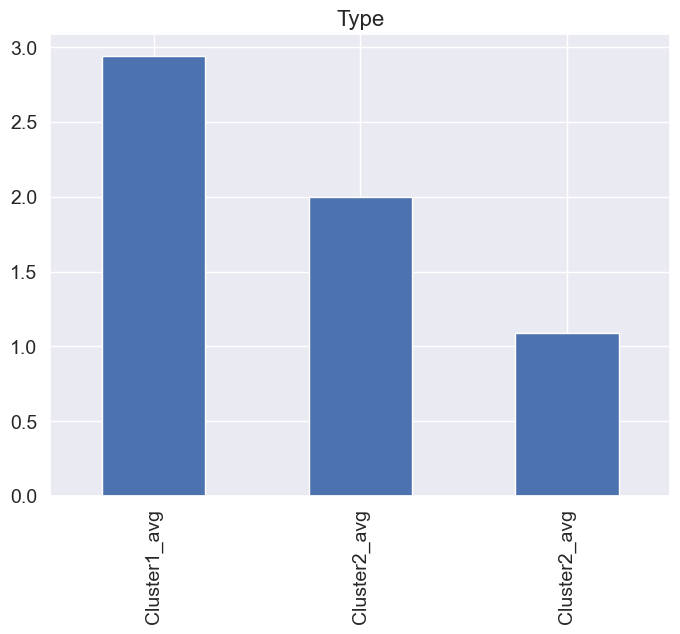

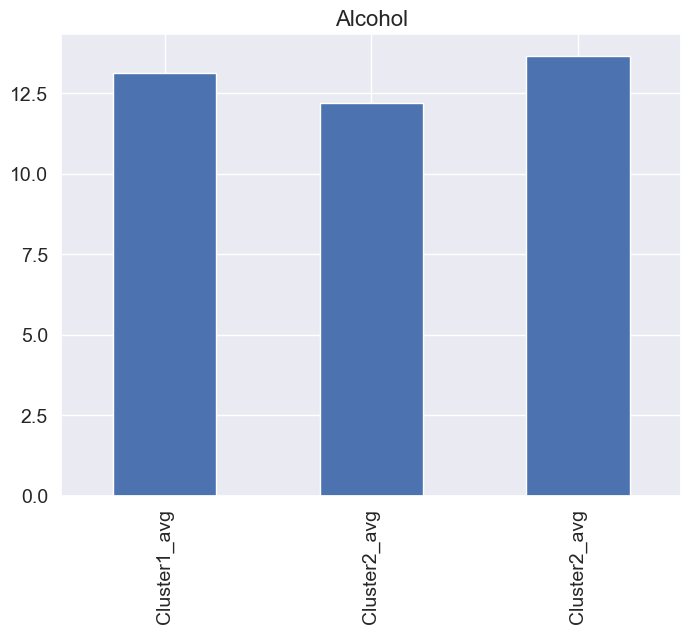

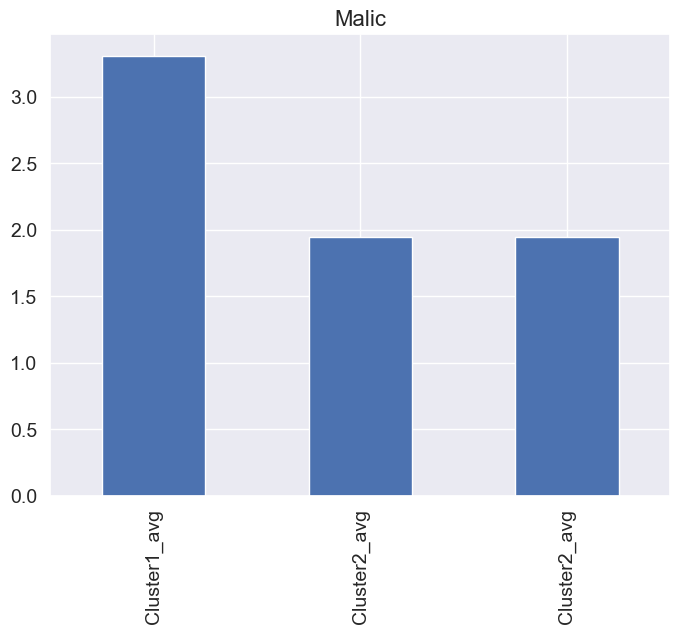

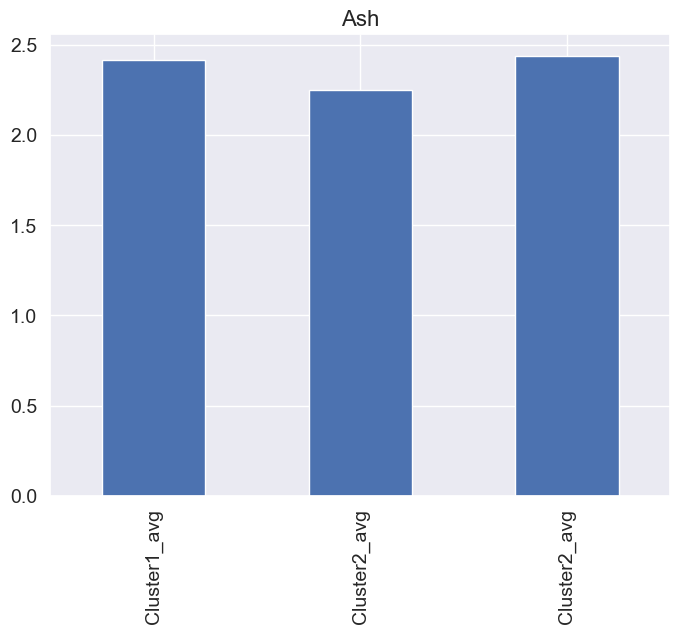

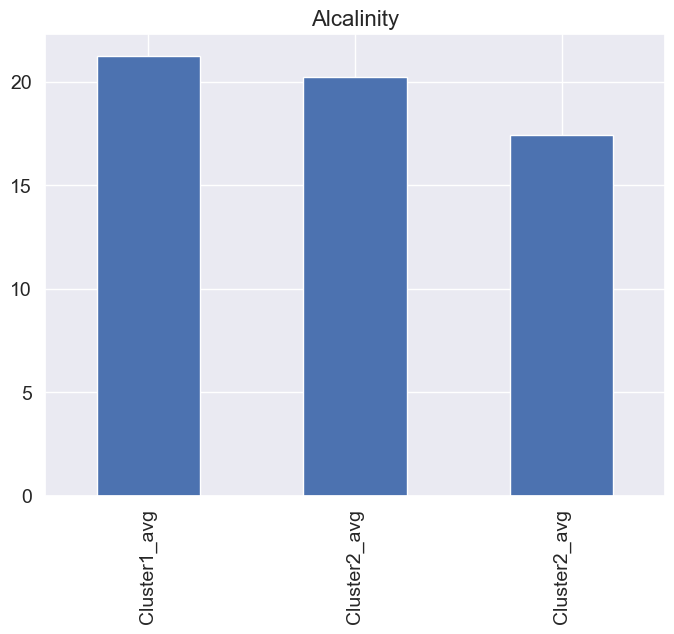

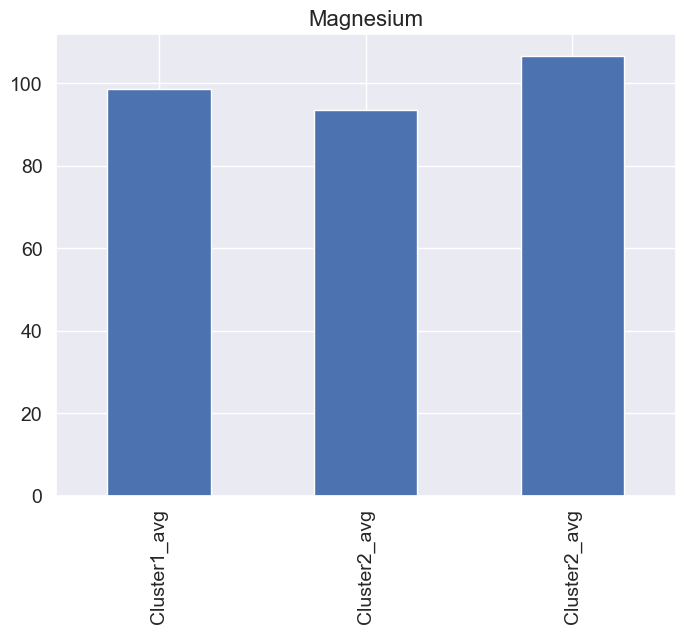

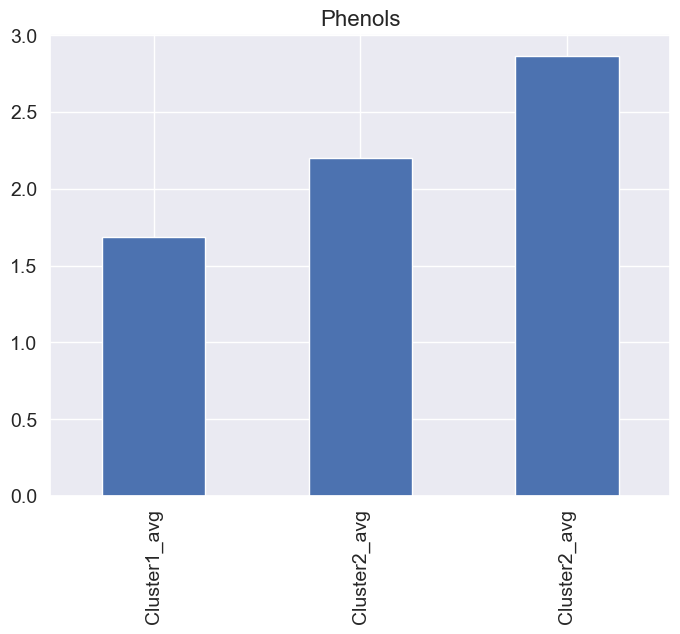

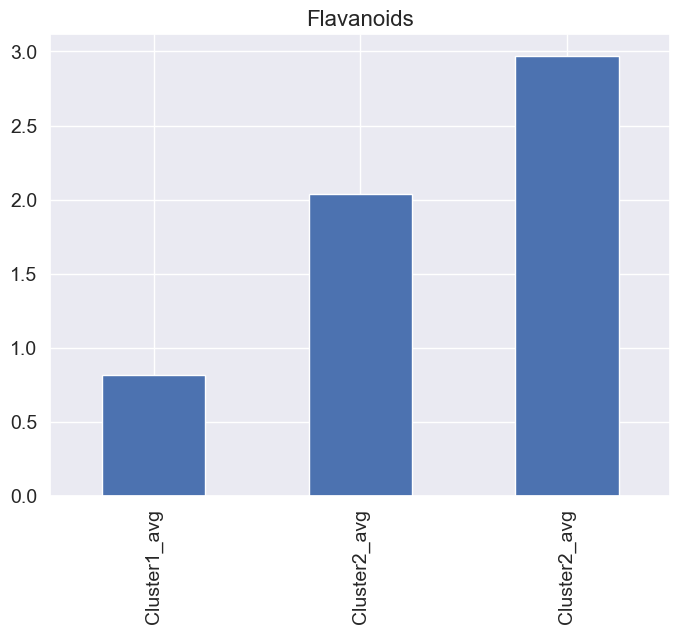

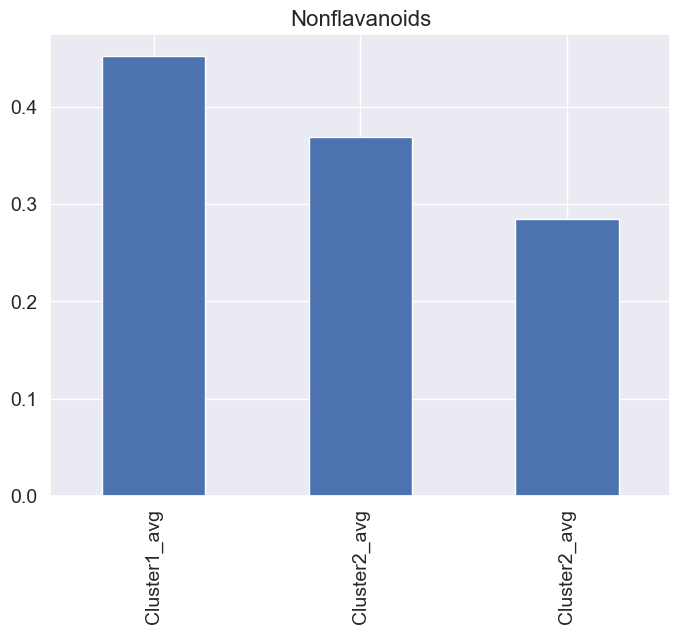

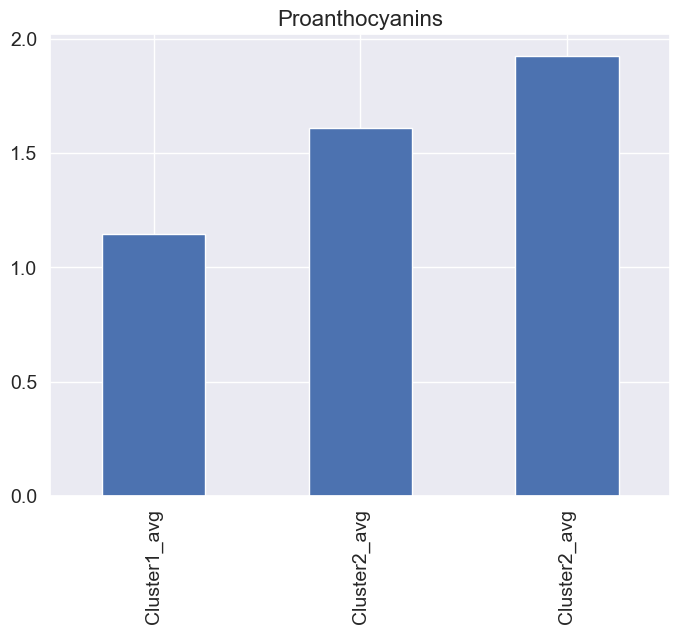

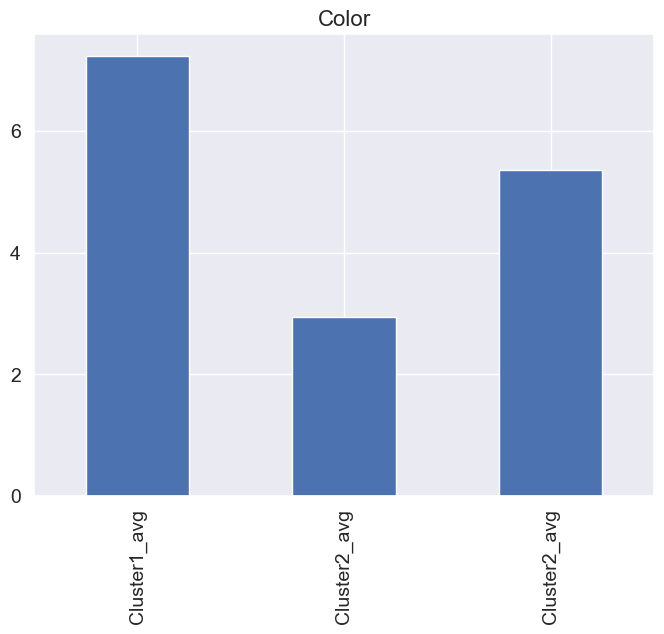

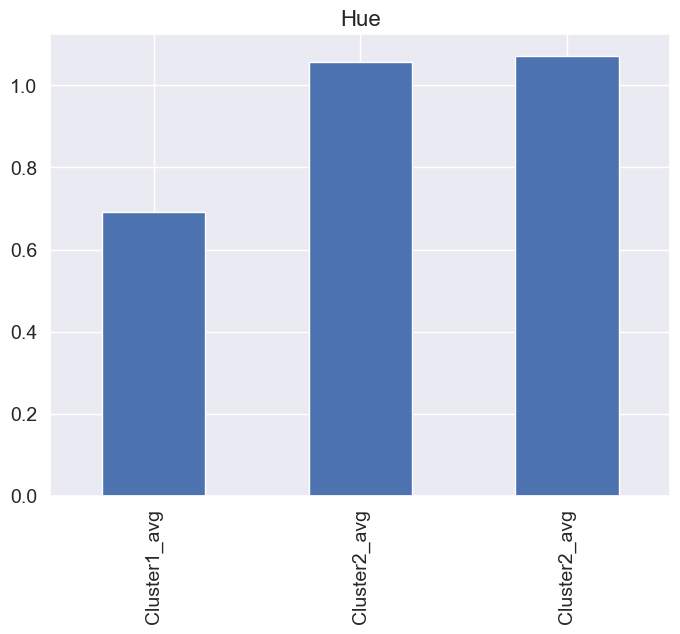

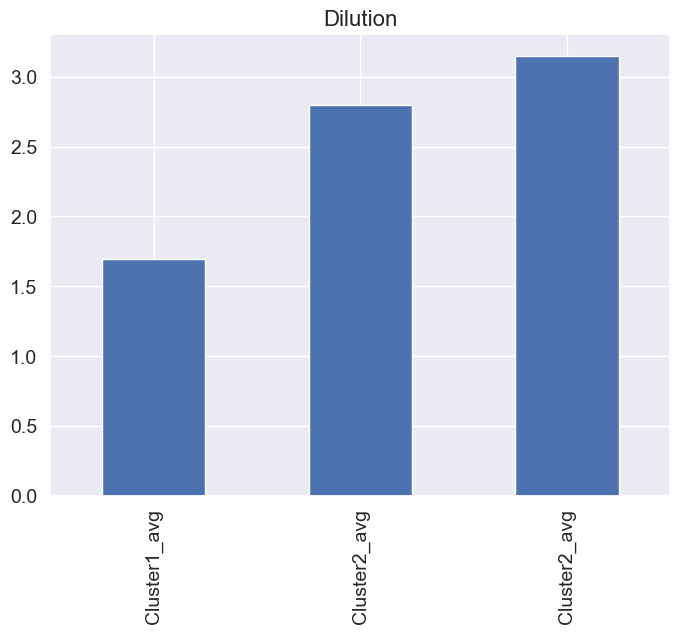

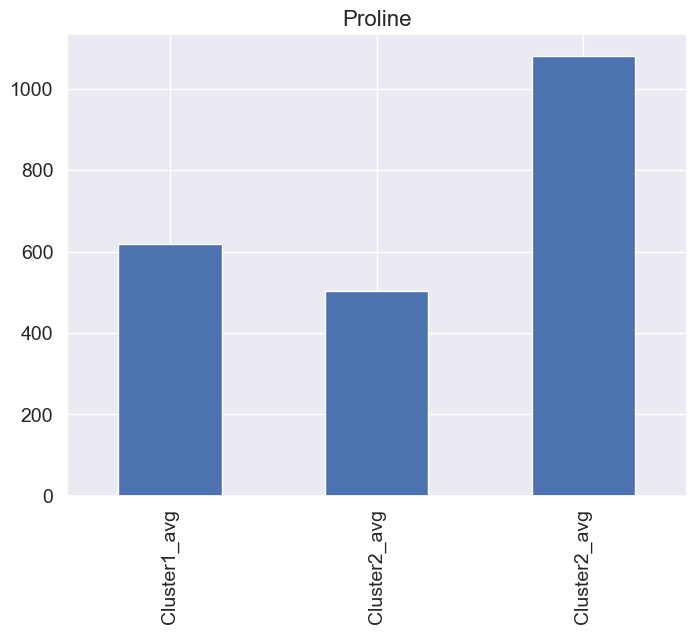

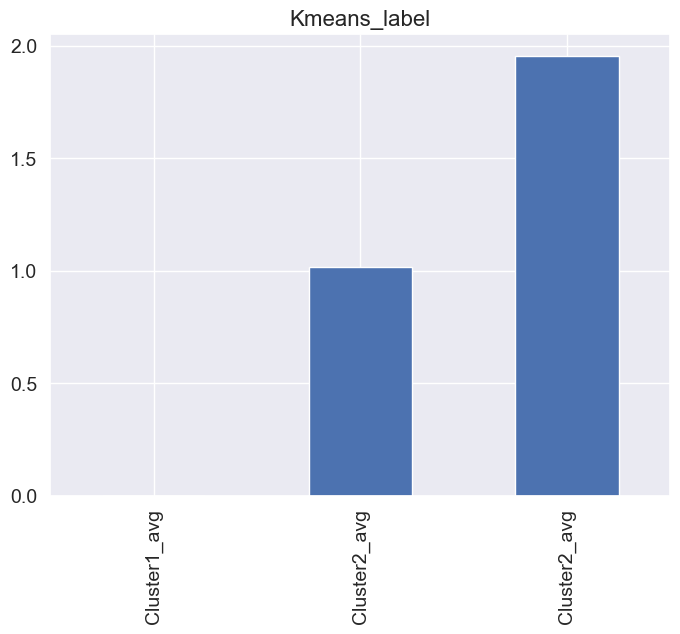

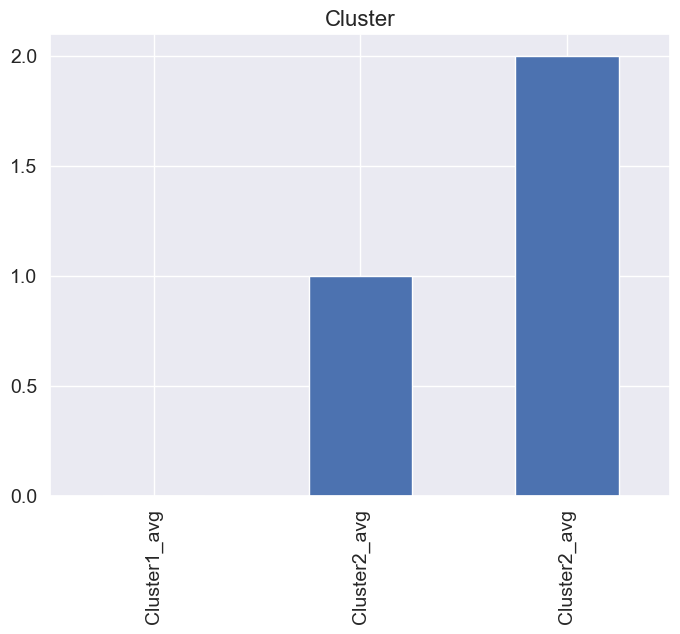

In [97]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

In [ ]:
# Comparing Kmeans Clusters with the Original Classified Dataset using "Type" Feature

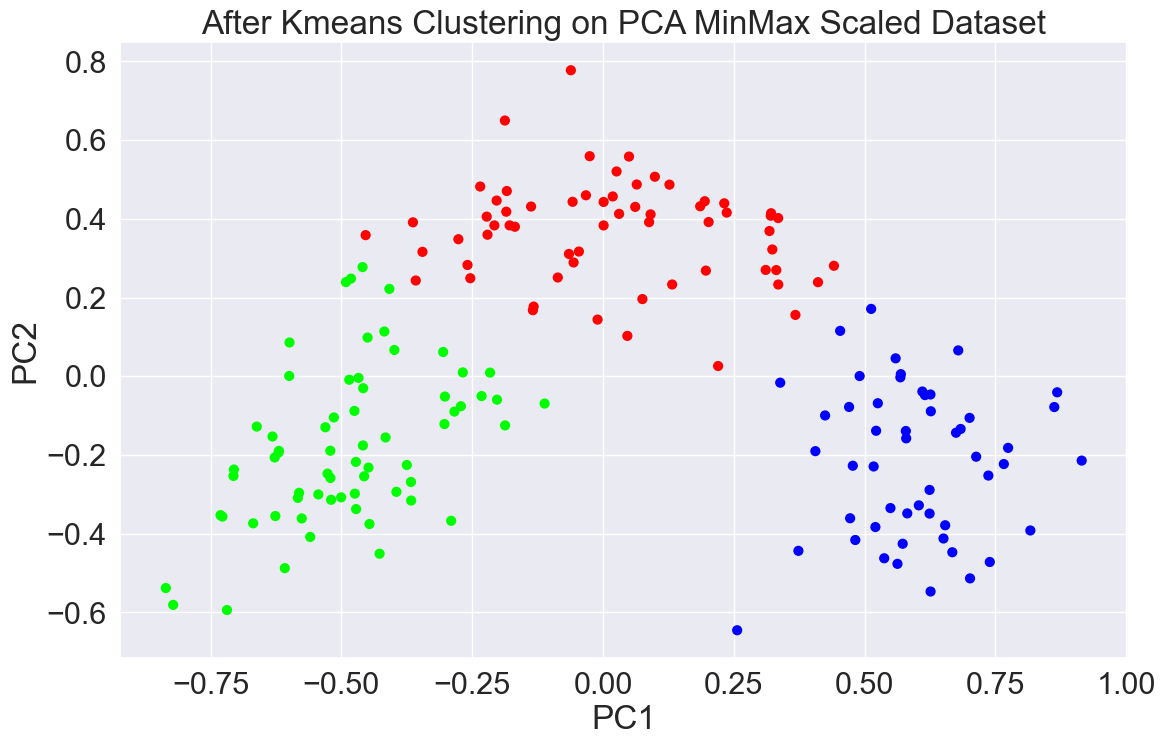

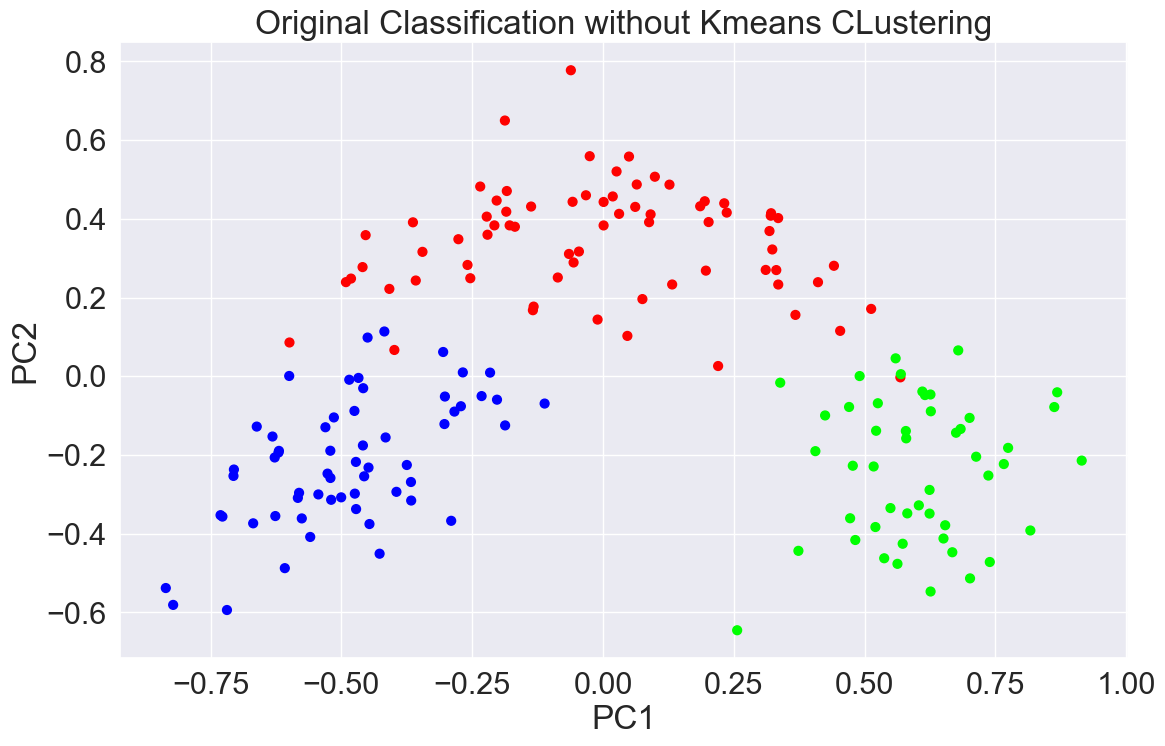

In [98]:
# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('After Kmeans Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Kmeans CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [99]:
# Group data by Clusters (K=3)
display('After Applying PCA and Kmens CLustering on Dataset',df.groupby('Kmeans_label').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying PCA and Kmens CLustering on Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,12.202742,1.946774,2.249839,20.211290,93.451613,2.200806,2.038710,0.369032,1.607903,2.949355,1.056387,2.801129,502.709677
2,13.656923,1.946154,2.437692,17.441538,106.584615,2.864615,2.970000,0.284308,1.923846,5.361692,1.071385,3.148923,1080.107692


'Original Classified Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.014085
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.000000


Note:
1.The Type 2 has been perfectly clustered and rest has negliglable amount of difference
2.We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column

In [ ]:
# t-SNE

In [100]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(minmax_df)

# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(178, 2)


,tsne comp. 1,tsne comp. 2
0,-6.262207,-10.074274
1,-2.607876,-8.425900
2,-2.933075,-11.700248
3,-4.970378,-13.429895
4,1.294030,-8.953932


In [ ]:
#t-SNE plot in 2D coloured by class

#Like PCA, t-SNE is an unsupervised algorithm, however we will use the same k-Means clusters from before to colour code the data points.

Text(0, 0.5, 'tsne component 2')

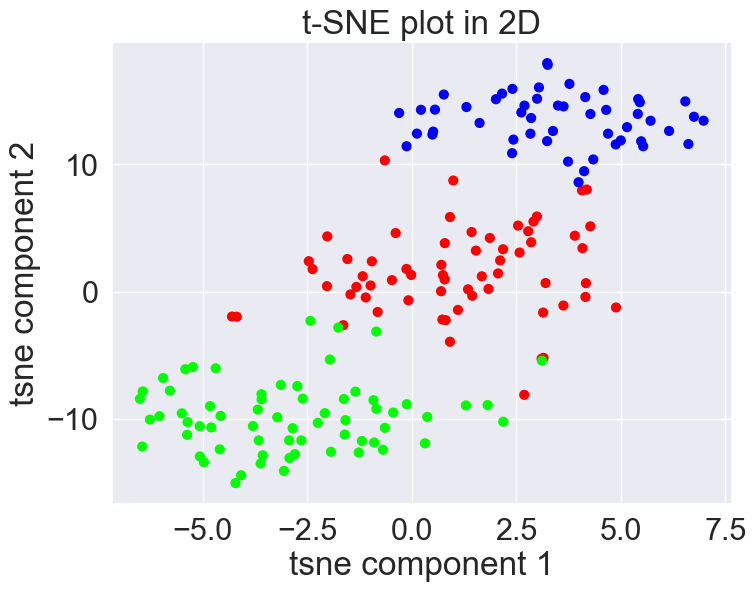

In [101]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=df['Kmeans_label'], cmap="brg", s=40)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

In [ ]:
# Hierarchical Clustering Algorithm

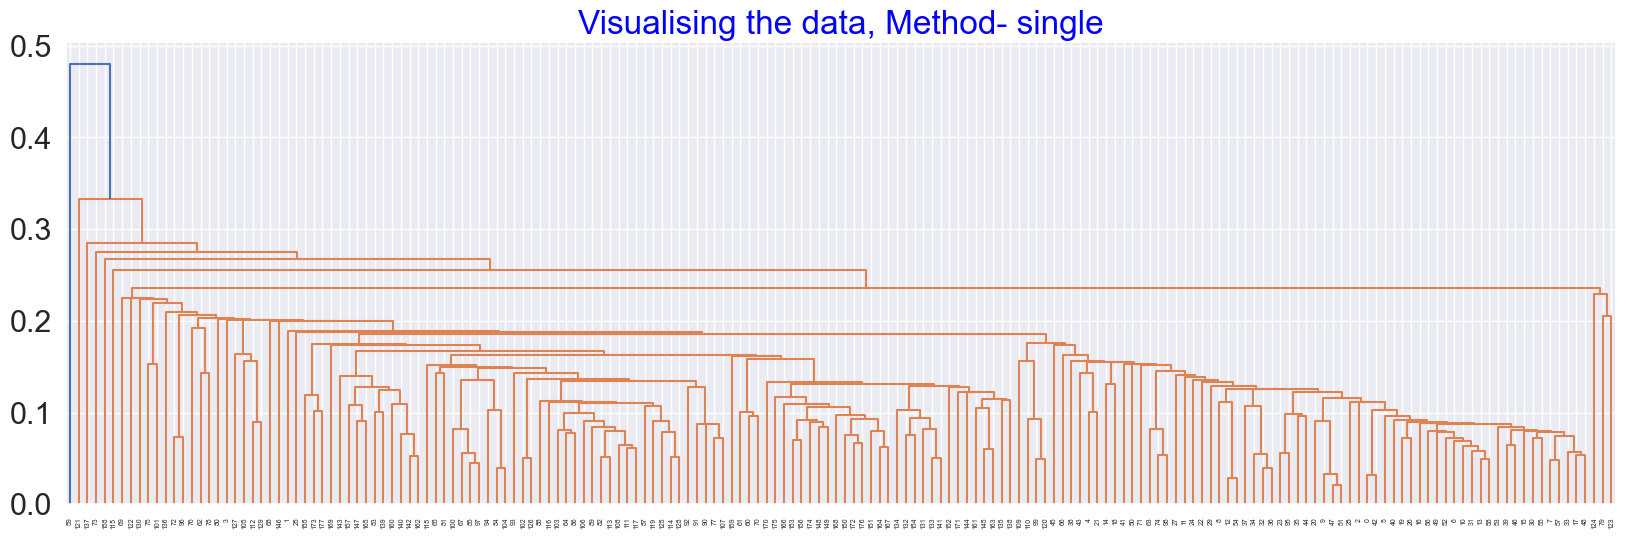

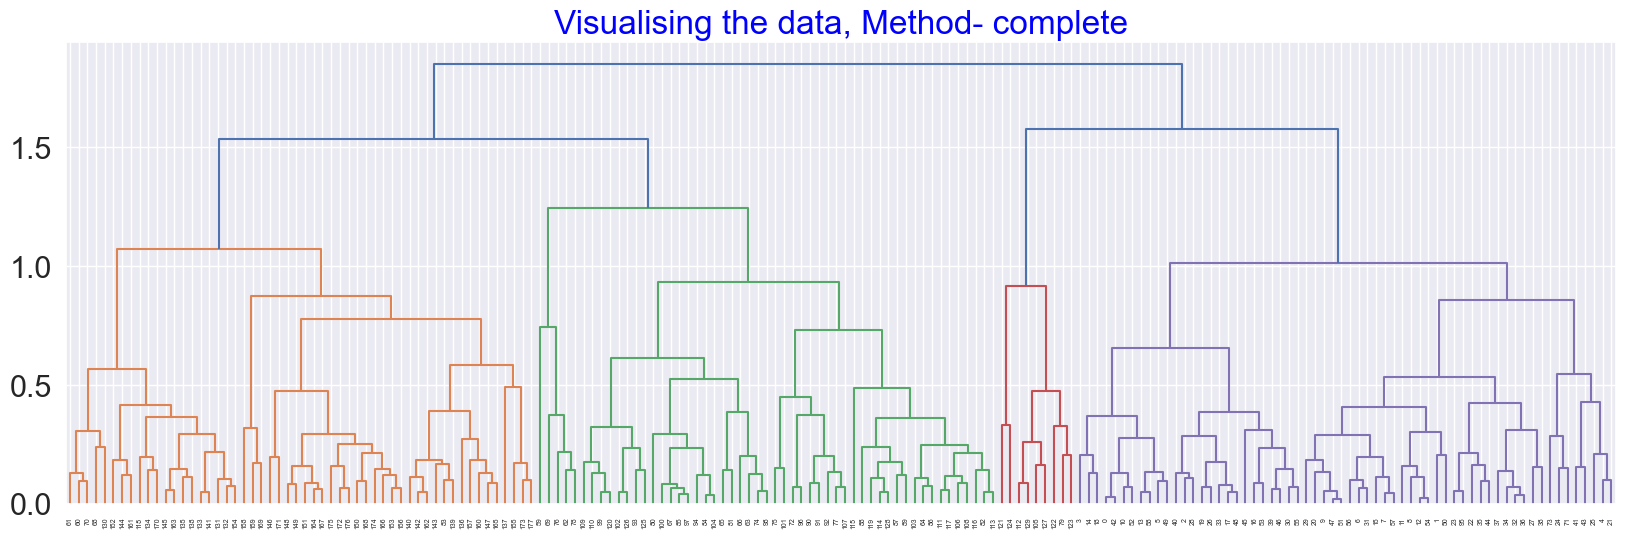

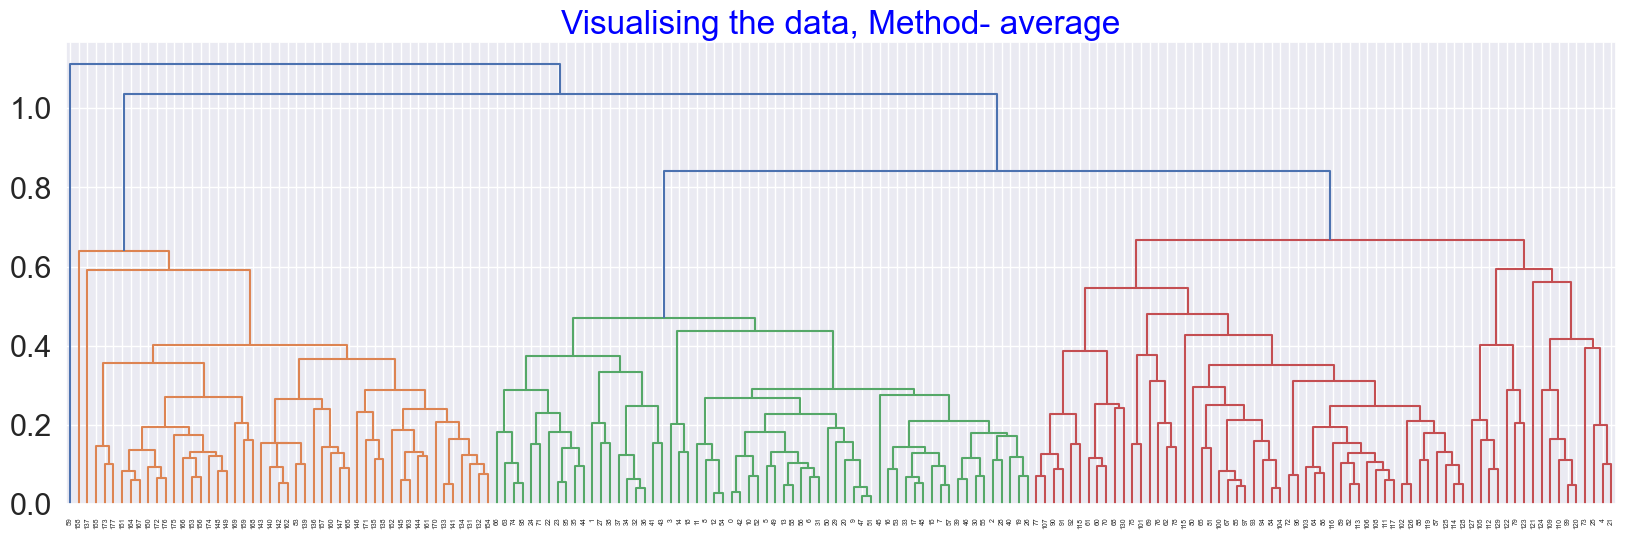

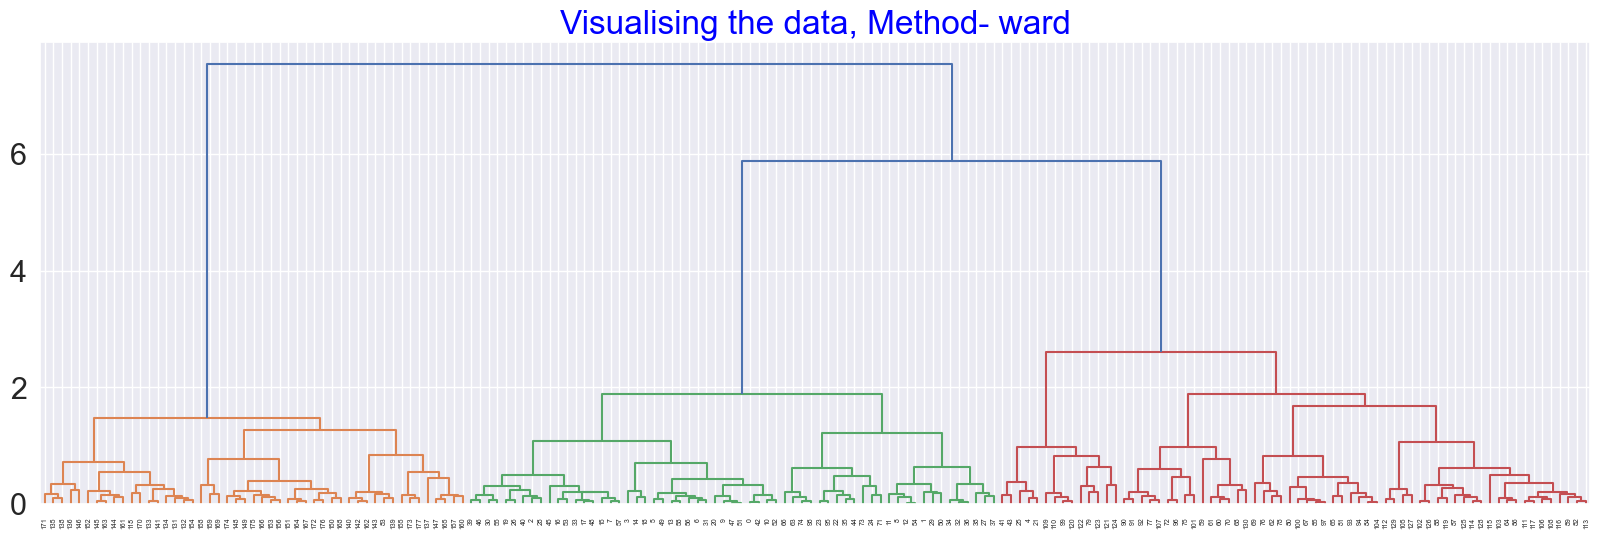

In [103]:
# Dendogram on PCA MinMaxScaler Applied Dataset

for methods in ['single','complete','average','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_minmax_df, method = methods,optimal_ordering=False))


In [104]:
# Silhouette Score method for PCA MinMax Scaled Data

# Applying Different Linkages using Euclidean Method for distance Calculation
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
        silhouette_score1 = sil(pca_minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42761758661440263
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.33853582730797477
For n_clusters = 2 The average silhouette_score with linkage- average : 0.265713030501229
For n_clusters = 2 The average silhouette_score with linkage- single : 0.265713030501229

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4596281708499888
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.2800601589658388
For n_clusters = 3 The average silhouette_score with linkage- average : 0.39054474828492275
For n_clusters = 3 The average silhouette_score with linkage- single : 0.14206633532594248

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.4238127562733953
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.445101756583814
For n_clusters = 4 The average silhouette_score with linkage- average : 0.447238509211693
For n

Note: For n_clusters = 3, the avg silhoutte score with linkage ward = 0.459 gives best score than others

In [105]:
# Applying Different Linkages using Different Distance Methods

n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_minmax_df)
            silhouette_score1 = sil(pca_minmax_df, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.33853582730797477
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.370765394139038
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.33853582730797477
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.370765394139038
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.39513430070299643

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.265713030501229
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.42761758661440263
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.265713030501229
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.4276175

For n_clusters = 7 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.2199895547842982
For n_clusters = 7 The average silhouette_score with linkage- complete and Affinity- l1 : 0.2828040965019644
For n_clusters = 7 The average silhouette_score with linkage- complete and Affinity- l2 : 0.2199895547842982
For n_clusters = 7 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.2828040965019644
For n_clusters = 7 The average silhouette_score with linkage- complete and Affinity- cosine : 0.288535121021064

For n_clusters = 7 The average silhouette_score with linkage- average and Affinity- euclidean : 0.34275816169199486
For n_clusters = 7 The average silhouette_score with linkage- average and Affinity- l1 : 0.33202695563471246
For n_clusters = 7 The average silhouette_score with linkage- average and Affinity- l2 : 0.34275816169199486
For n_clusters = 7 The average silhouette_score with linkage- average and Affinity- manhattan : 0.33202

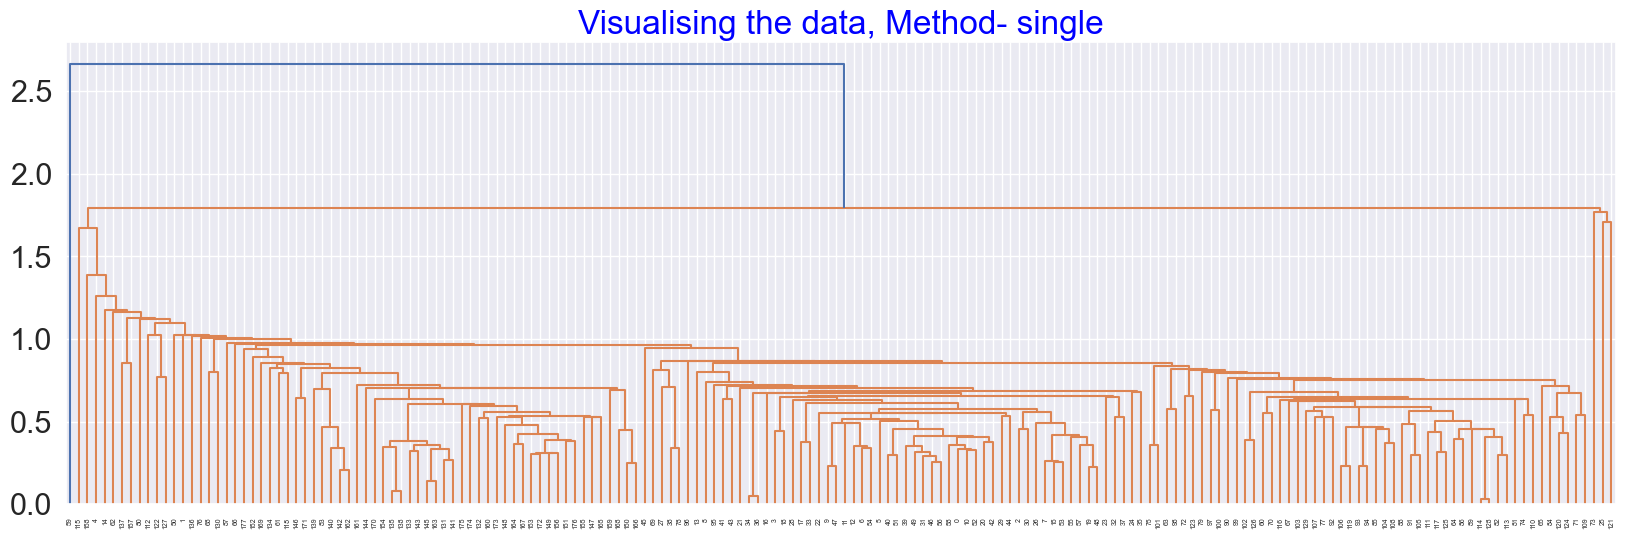

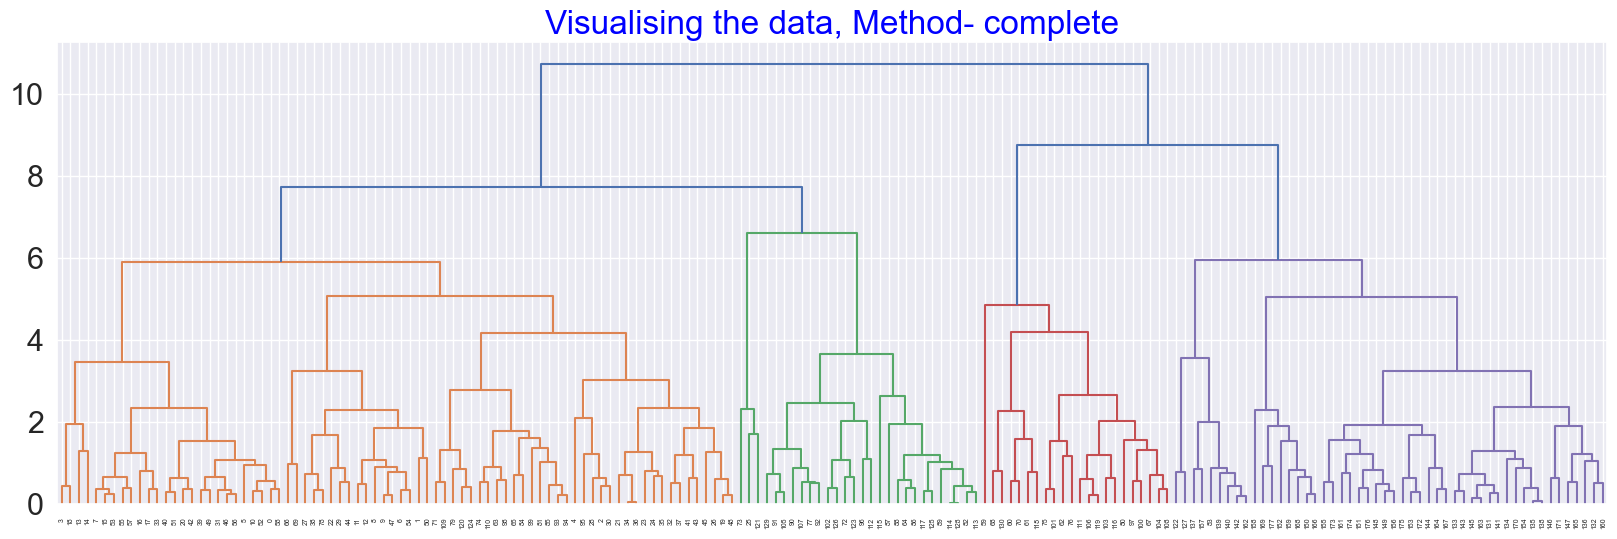

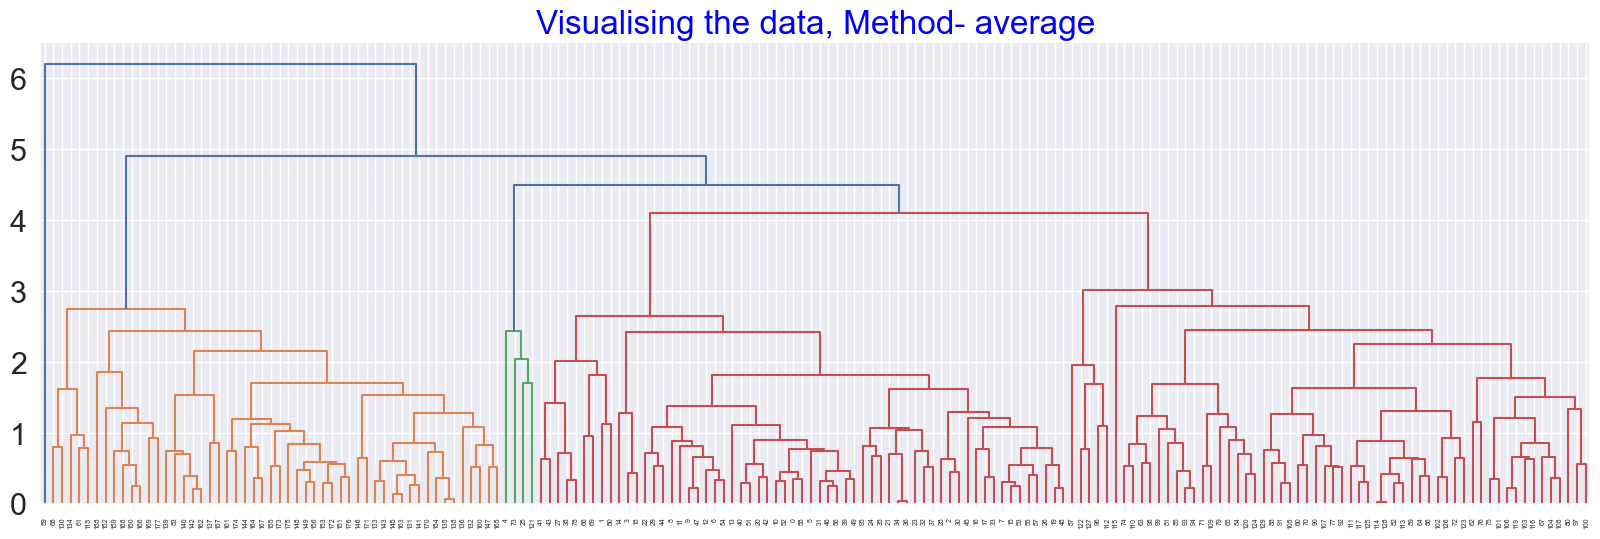

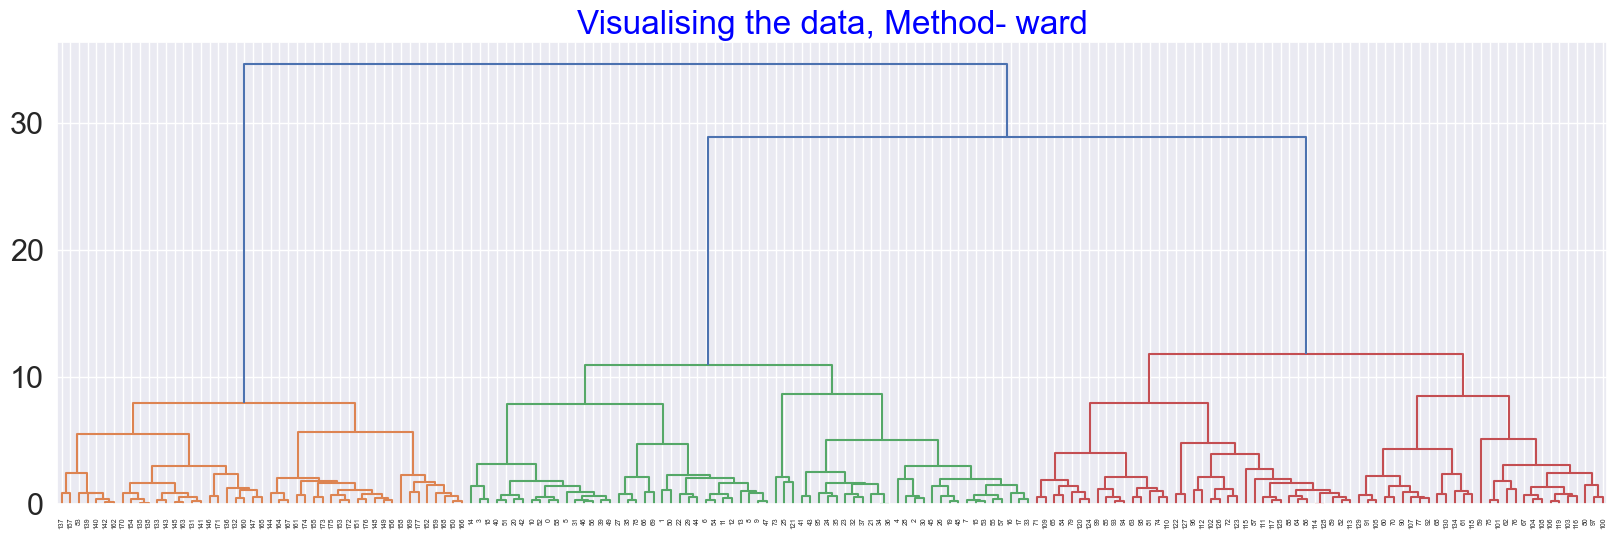

In [106]:
# Dendrogram on Standard Scaler Applied on Data

for methods in ['single','complete','average','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(pca_std_df, method = methods,optimal_ordering=False))

In [107]:
# Silhouette Score method for PCA Standard Scaled Data
# Applying Different Linkages using Euclidean Method for distance Calculation

n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()


For n_clusters = 2 The average silhouette_score with linkage- ward : 0.39509037225075383
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.32546865442450856
For n_clusters = 2 The average silhouette_score with linkage- average : 0.36310673051041414
For n_clusters = 2 The average silhouette_score with linkage- single : 0.36310673051041414

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.44594921980629704
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.28750089351606356
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3867254520074772
For n_clusters = 3 The average silhouette_score with linkage- single : 0.2166287164412577

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.38195690348144407
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.35784842685673063
For n_clusters = 4 The average silhouette_score with linkage- average : 0.32173131311197

Note: For n_clusters = 3, the avg silhoutte score with linkage ward = 0.445 gives best score than others

In [108]:
# Applying Different Linkages using Different Distance Methods

n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
            silhouette_score1 = sil(pca_std_df, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.32546865442450856
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.3861976738993028
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.32546865442450856
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.3861976738993028
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.33263007508998715

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.36310673051041414
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.36310673051041414
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.36310673051041414
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.3

For n_clusters = 7 The average silhouette_score with linkage- single and Affinity- cosine : -0.10063743011163914

For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.2675496836392115
For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- l1 : 0.20328791339441993
For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- l2 : 0.2675496836392115
For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.20328791339441993
For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- cosine : 0.2740415261834102

For n_clusters = 8 The average silhouette_score with linkage- average and Affinity- euclidean : 0.2900448801576871
For n_clusters = 8 The average silhouette_score with linkage- average and Affinity- l1 : 0.2912558664331552
For n_clusters = 8 The average silhouette_score with linkage- average and Affinity- l2 : 0.290044

In [ ]:
# Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on Standard Scaled Data

In [109]:
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete', affinity='l1')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 2, 1, 0, 1, 0, 2, 3, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 3, 1, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [110]:
# Cluster numbers

agg_clustering.n_clusters_

4

In [111]:
# Clustering Score

(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

36.787

In [112]:
#Putting Cluster lables into original dataset And analysis of the same
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label,Hierarchical_labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,3


In [113]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,,,
0,13.437260,1.978630,2.393151,17.341096,105.219178,2.831507,2.914247,0.282466,2.006575,5.096986,1.062603,3.119726,1011.767123,1.849315
1,12.941538,3.076615,2.418462,21.215385,97.538462,1.706154,0.986769,0.465846,1.182154,6.314462,0.756400,1.854615,604.584615,0.215385
2,12.254167,1.752500,2.150556,20.019444,89.805556,2.195000,1.971944,0.332500,1.452500,2.793611,1.091111,2.868611,465.972222,1.000000
3,12.710000,2.090000,2.980000,26.125000,125.000000,2.977500,3.335000,0.385000,1.892500,4.312500,1.102500,3.330000,753.750000,1.750000


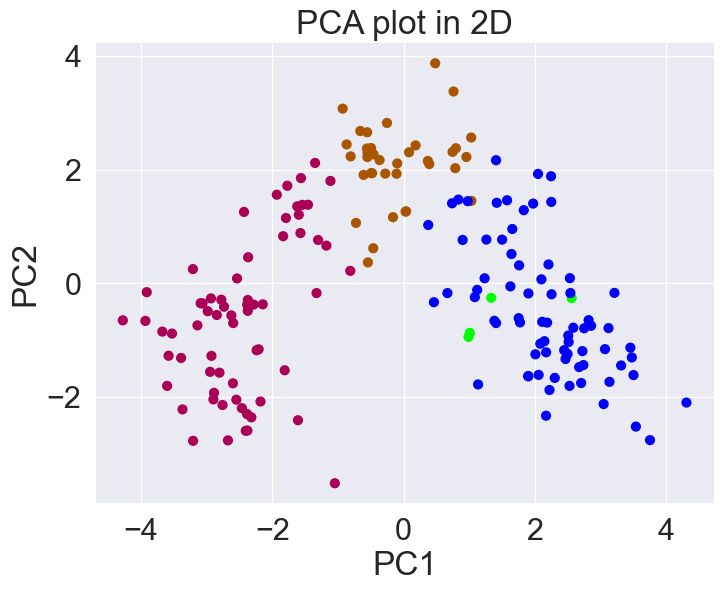

In [115]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Note: Now We cannot clearly see the 4 number of clusters formed.

In [ ]:
# Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

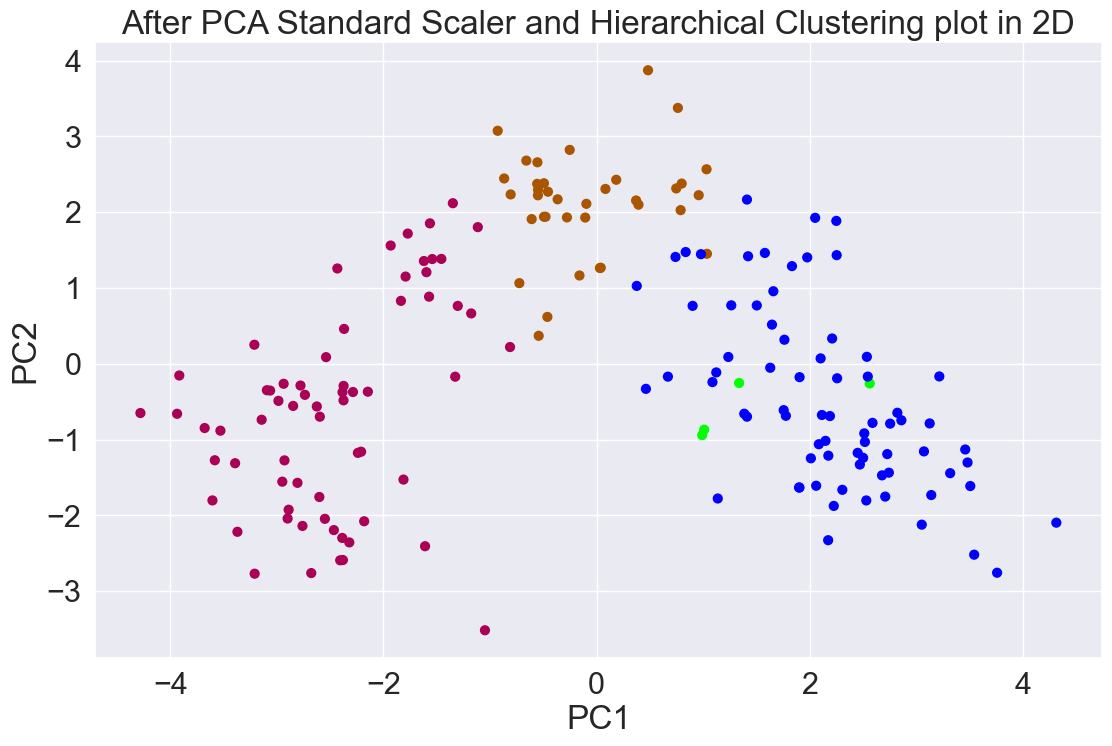

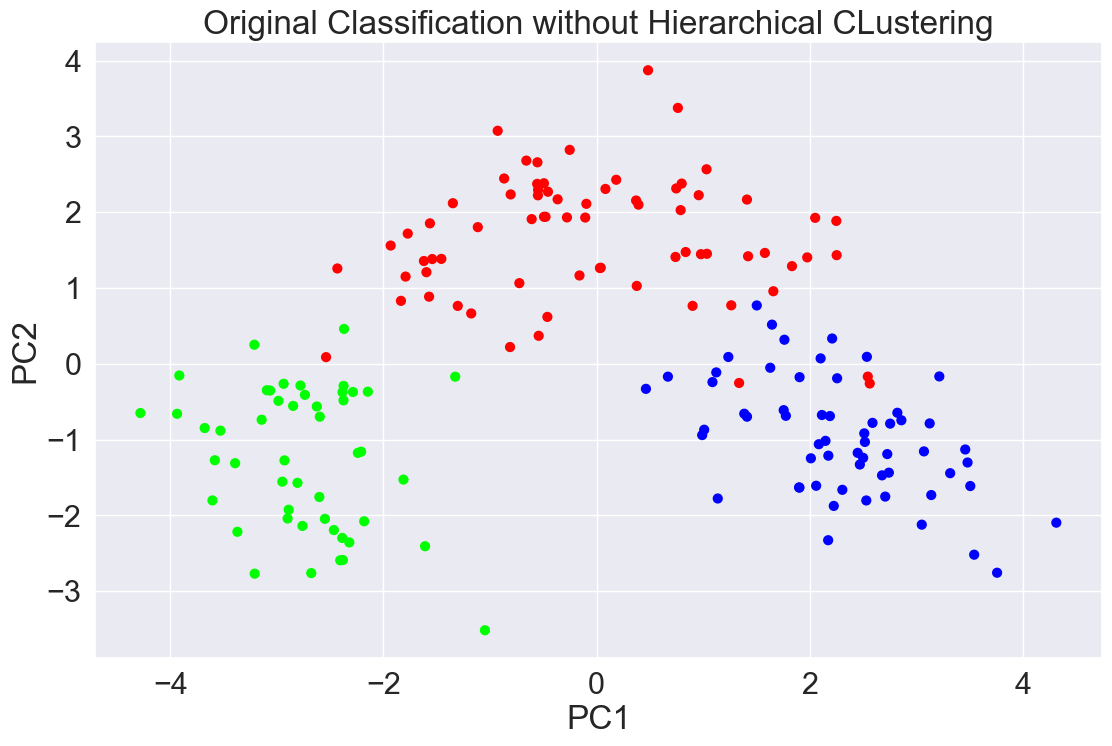

In [116]:
# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_std_df.iloc[:,0], pca_std_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [117]:
# Group data by Clusters (Clusters=4)
display('After Applying Hierarchical Clustering on PCA Standard Scaled Dataset',df.groupby('Hierarchical_labels').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying Hierarchical Clustering on PCA Standard Scaled Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,,,
0,13.437260,1.978630,2.393151,17.341096,105.219178,2.831507,2.914247,0.282466,2.006575,5.096986,1.062603,3.119726,1011.767123,1.849315
1,12.941538,3.076615,2.418462,21.215385,97.538462,1.706154,0.986769,0.465846,1.182154,6.314462,0.756400,1.854615,604.584615,0.215385
2,12.254167,1.752500,2.150556,20.019444,89.805556,2.195000,1.971944,0.332500,1.452500,2.793611,1.091111,2.868611,465.972222,1.000000
3,12.710000,2.090000,2.980000,26.125000,125.000000,2.977500,3.335000,0.385000,1.892500,4.312500,1.102500,3.330000,753.750000,1.750000


'Original Classified Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.014085
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.000000


Note: As you can see the most of the data is in the first three clusters and very little amount of data in the last cluster so it must been that clusters are overlapping or may be that the data belonging to clusters may be wrong/incorrect.

In [ ]:
# Run Hierarchical Clustering.(Agglomerative Clustering) For PCA on MinMaxScaled Data

In [118]:
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='l2')
y_pred_hie = agg_clustering.fit_predict(pca_minmax_df)
print(y_pred_hie.shape)
y_pred_hie

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [119]:
# Cluster numbers

agg_clustering.n_clusters_

3

In [120]:
# Clustering Score

(sil(pca_minmax_df, agg_clustering.labels_)*100).round(3)

39.054

In [ ]:
# Putting Cluster lables into original dataset And analysis of the same

In [121]:
# Concating Labels with main dataset copy

df['Hierarchical_labels'] = agg_clustering.labels_
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label,Hierarchical_labels
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,0


In [122]:
df.groupby('Hierarchical_labels').agg(['mean'])

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,,,
0,12.947054,1.956589,2.348062,18.813953,100.279070,2.525814,2.502248,0.327519,1.757442,4.206744,1.058341,2.957597,793.077519,1.48062
1,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000,1.00000
2,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,0.00000


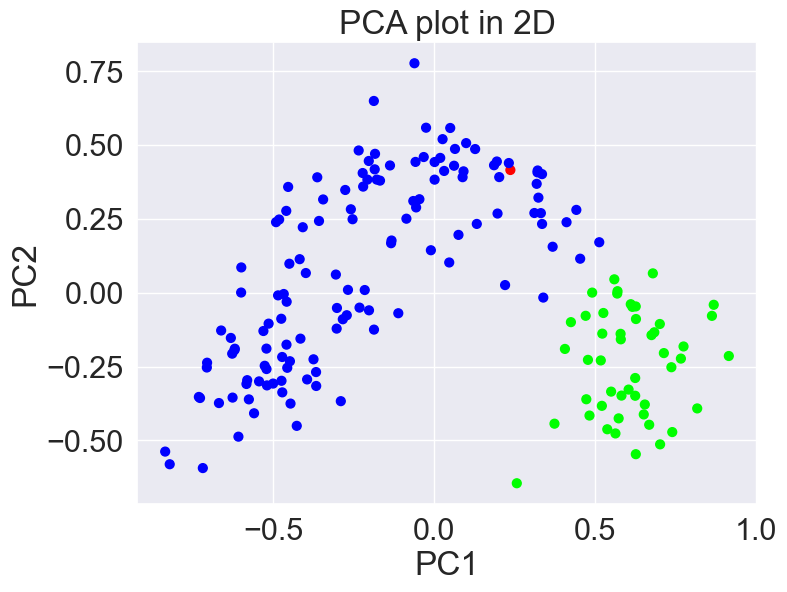

In [123]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [126]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns= ['Cluster3_avg'])

In [127]:
avg_df = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_df

,Cluster1_avg,Cluster2_avg,Cluster3_avg
Type,2.941176,2.000000,1.092308
Alcohol,13.134118,12.202742,13.656923
Malic,3.307255,1.946774,1.946154
Ash,2.417647,2.249839,2.437692
Alcalinity,21.241176,20.211290,17.441538
Magnesium,98.666667,93.451613,106.584615
Phenols,1.683922,2.200806,2.864615
Flavanoids,0.818824,2.038710,2.970000
Nonflavanoids,0.451961,0.369032,0.284308
Proanthocyanins,1.145882,1.607903,1.923846


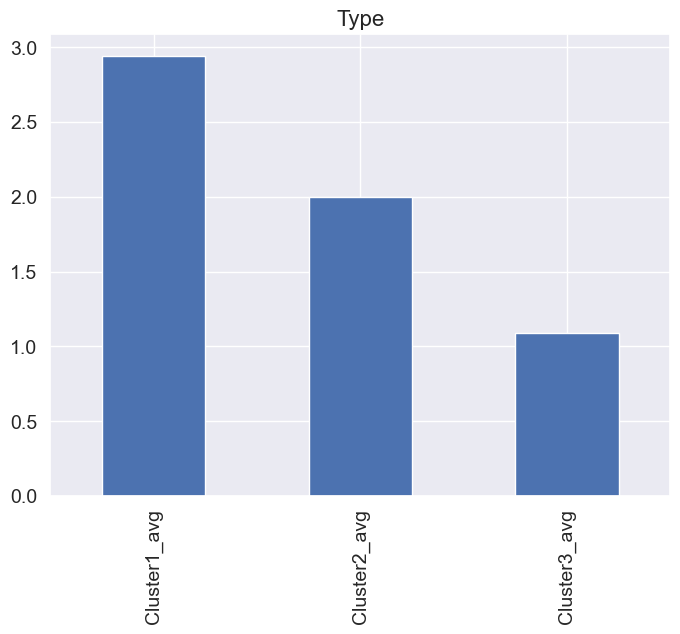

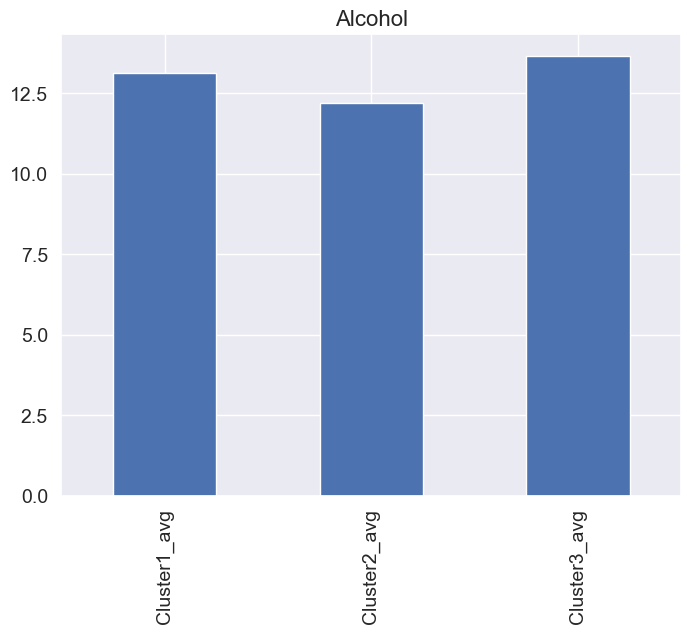

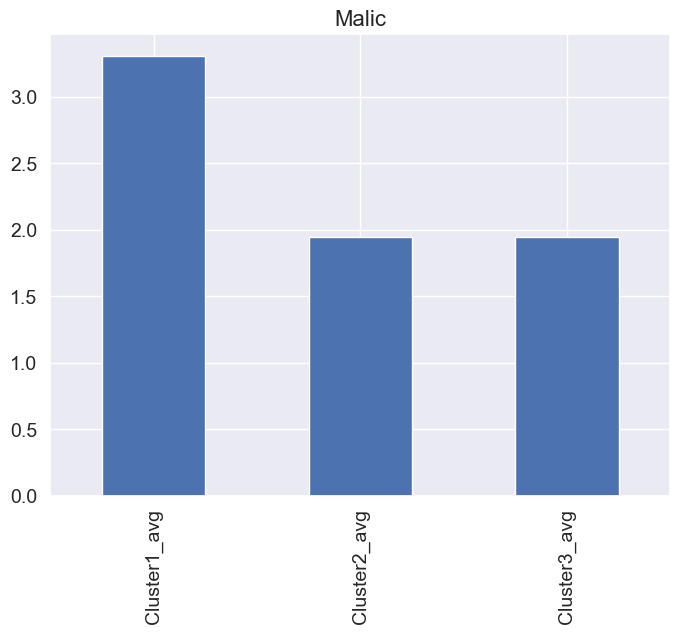

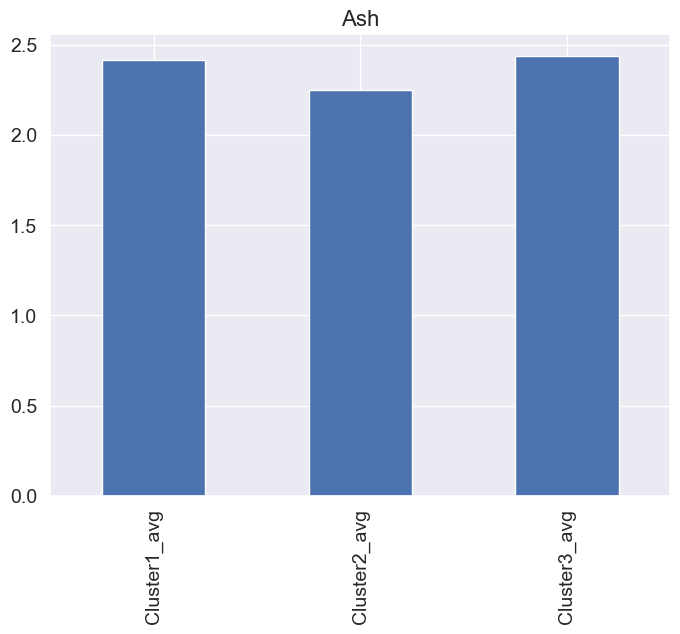

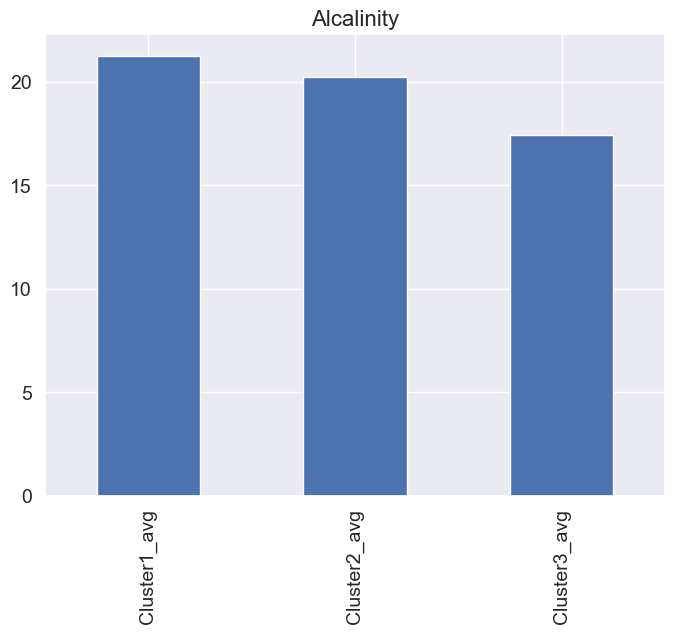

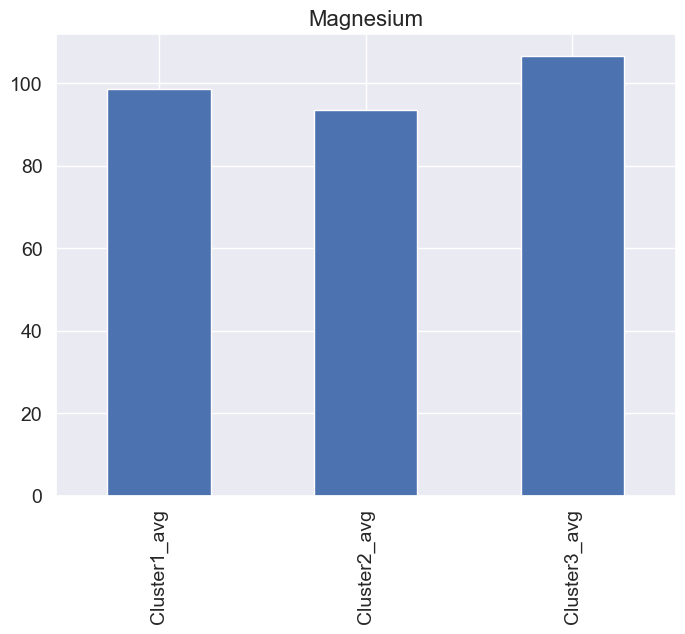

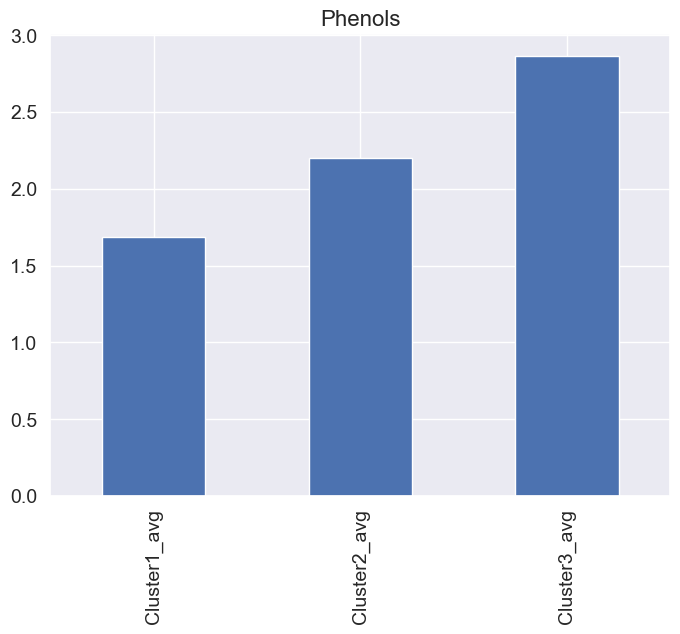

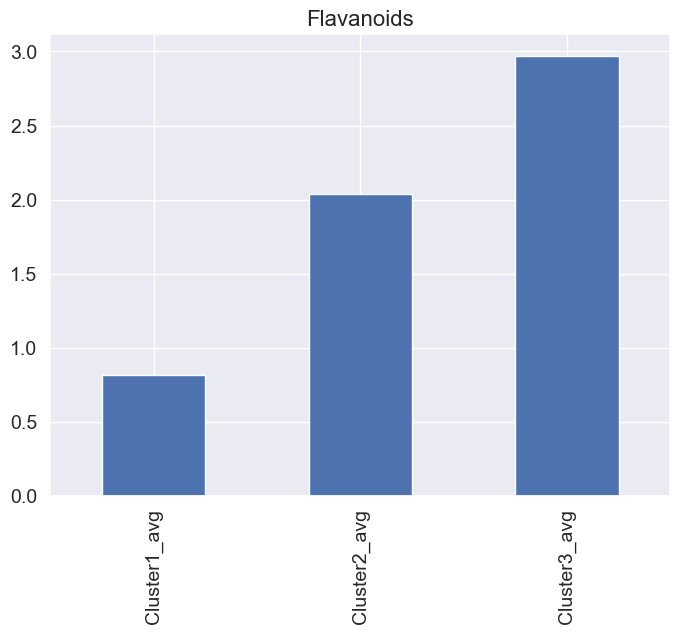

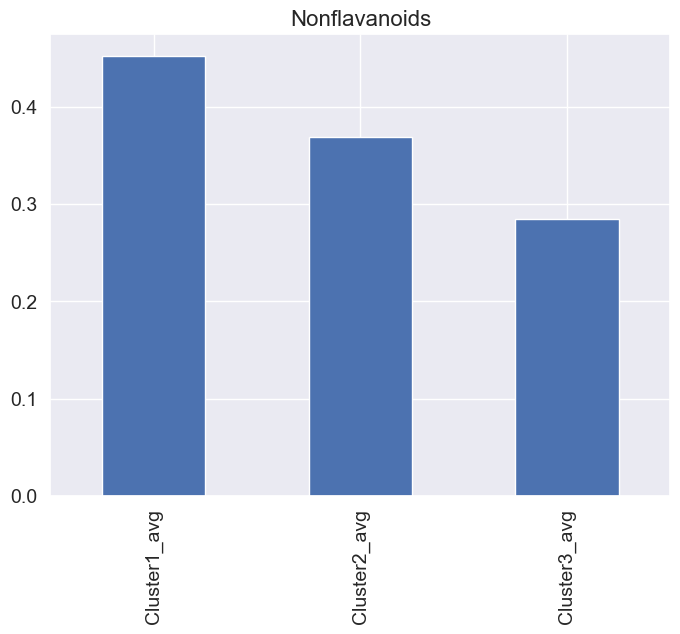

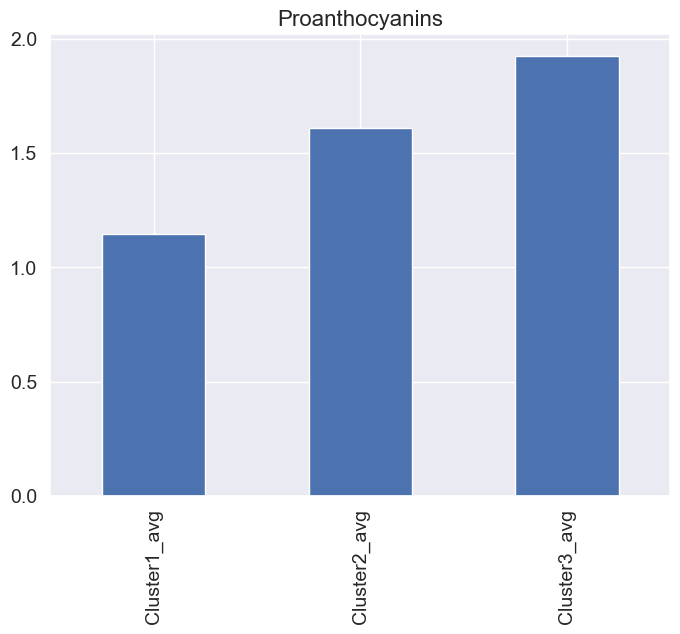

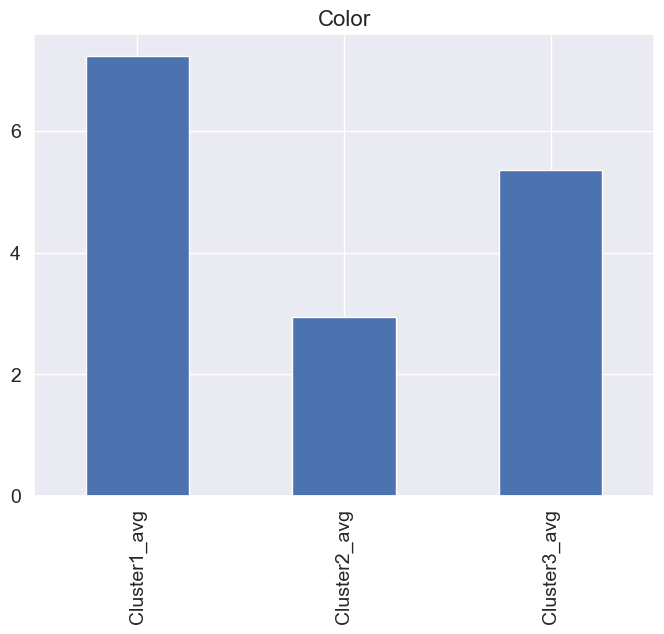

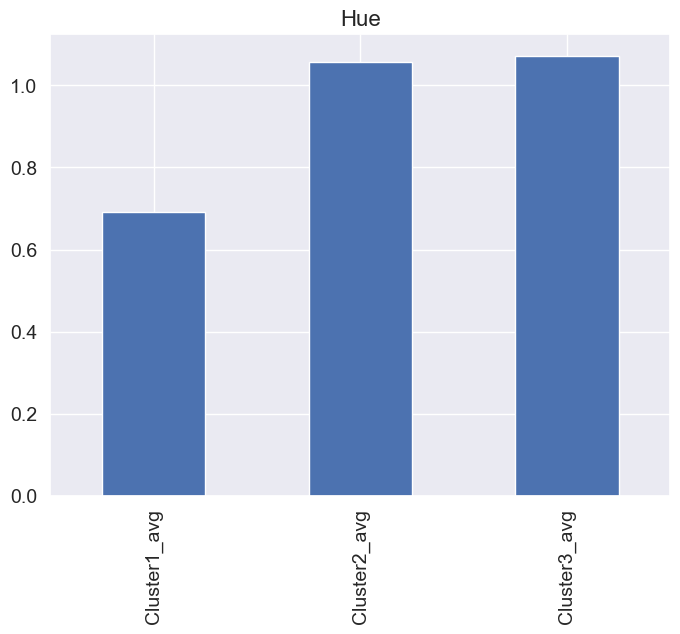

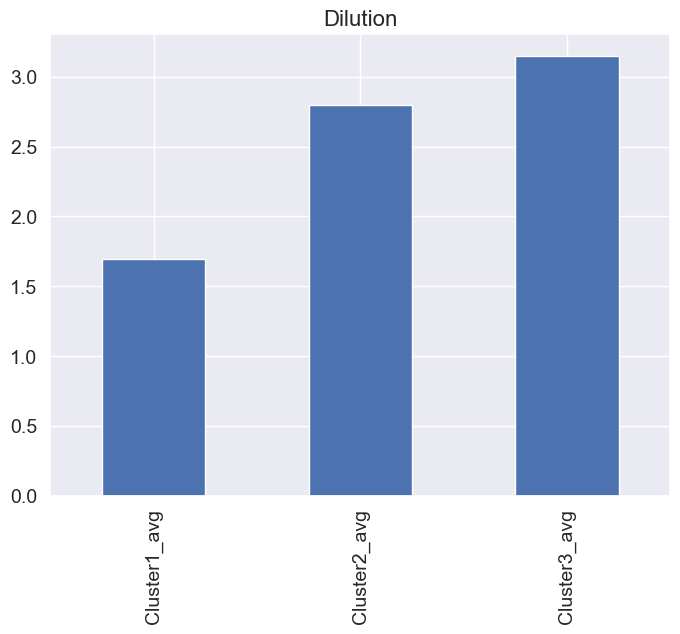

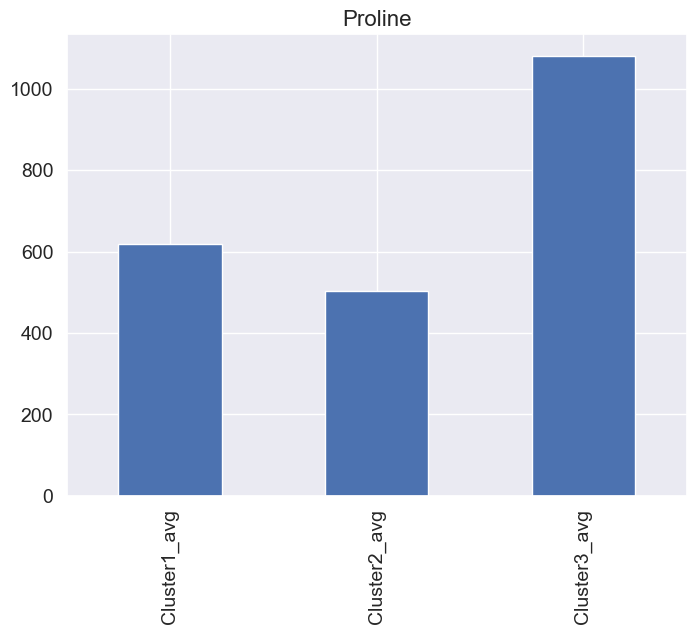

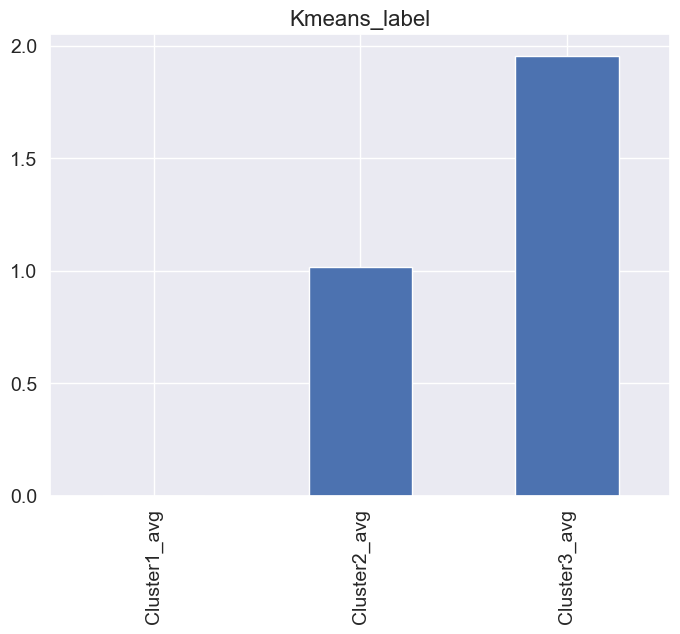

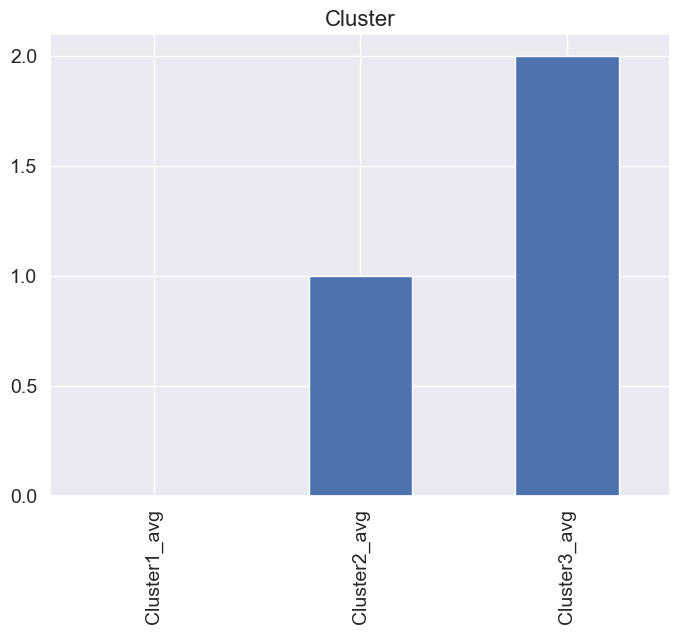

In [128]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

In [ ]:
# Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

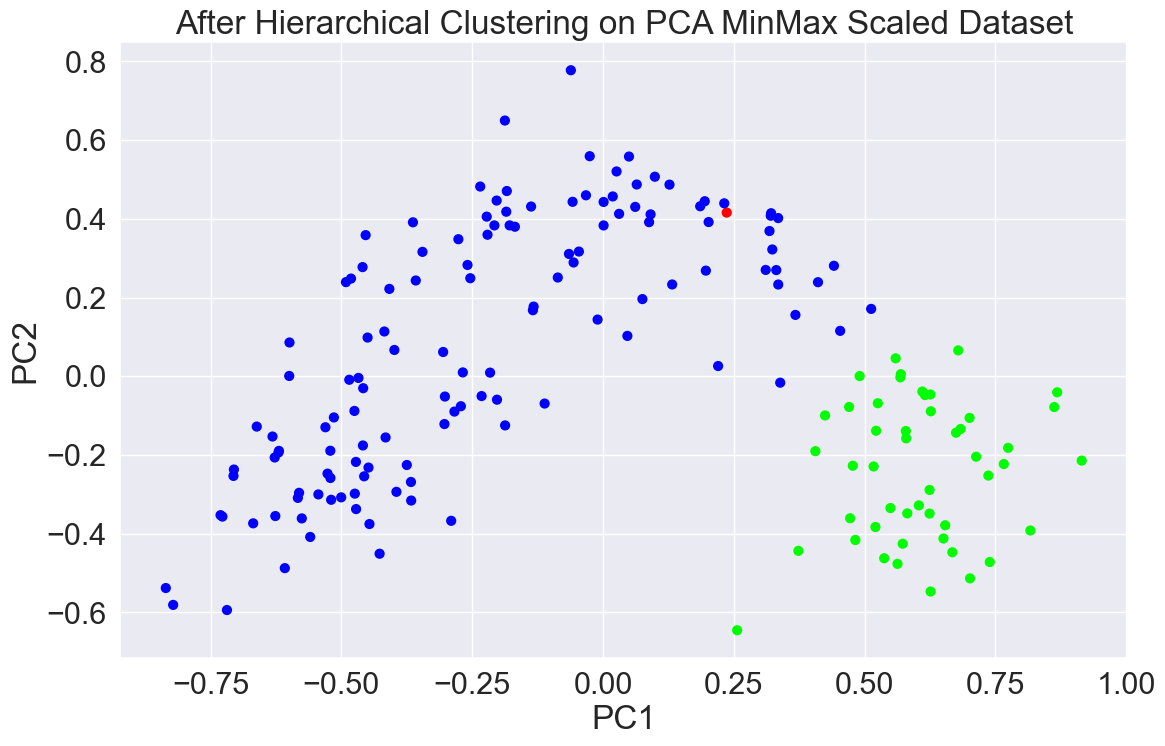

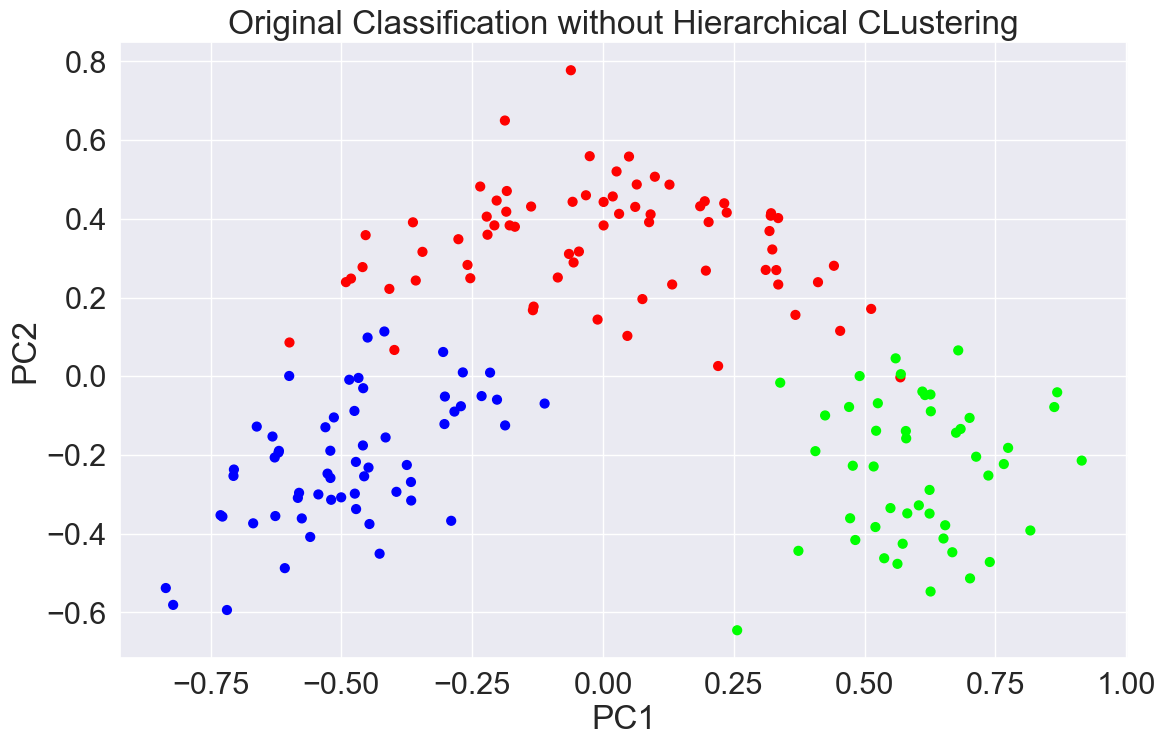

In [129]:
# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=df['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('After Hierarchical Clustering on PCA MinMax Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_minmax_df.iloc[:,0], pca_minmax_df.iloc[:,1], c=data['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [130]:
# Group data by Clusters (K=3)
display('After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset',df.groupby('Hierarchical_labels').agg(['mean']),'Original Classified Dataset',data.groupby('Type').agg(['mean']))

'After Applying Hierarchical CLustering on  PCA MinMax Scaled Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,,,
0,12.947054,1.956589,2.348062,18.813953,100.279070,2.525814,2.502248,0.327519,1.757442,4.206744,1.058341,2.957597,793.077519,1.48062
1,12.370000,0.940000,1.360000,10.600000,88.000000,1.980000,0.570000,0.280000,0.420000,1.950000,1.050000,1.820000,520.000000,1.00000
2,13.157708,3.386042,2.437083,21.510417,98.541667,1.681667,0.788542,0.455833,1.167708,7.410833,0.684375,1.698542,627.500000,0.00000


'Original Classified Dataset'

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Type,,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864,2.000000
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042,1.014085
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833,0.000000


Note:
     1.The 3 clusters has been clustered but has a negliglable amount of difference compared to original classified Feature
     2.We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column

Conclusion:
           1.I have applied EDA to analyze dataset and discovered correlation between different variables and found colinearity.
           2.Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
           3.Used & analyzed two clustering techniques here..i) KMeans ii) Hierarchical Clusterig
             By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So                  finally the Standard Scaler found less score, so not used for further model building.